### Import Dependancies 

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

### Load Data 

In [2]:
Data_path='/kaggle/input/survival-analysis-data/'

In [3]:
!ls

In [4]:
enrollement = pd.read_csv('/kaggle/input/survival-analysis-data/Enrollement_data.csv').rename(columns={'Student_No ':'reg_no', 'Department ':'Department'})
enrollement.shape

(300, 5)

In [5]:
enrollement.head()

enrollement.reg_no = enrollement.reg_no.str.strip() 

## EDA

In [6]:
enrollement.reg_no.nunique()  # each reg number is unique 

300

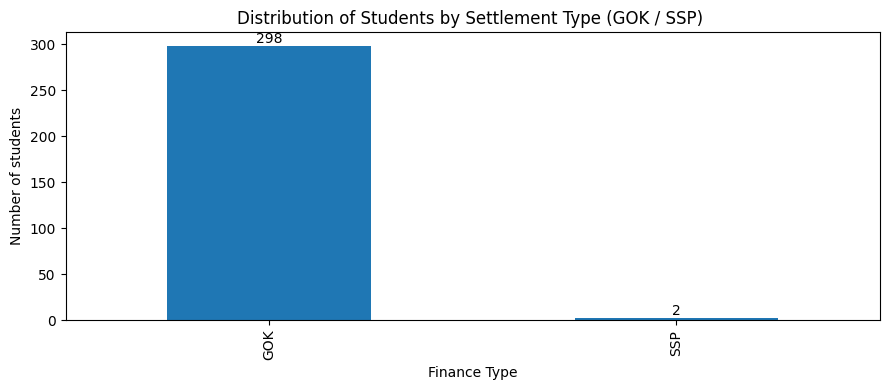

In [7]:
plt.figure(figsize=(9,4))
ax= enrollement['Settlement Type'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.ylabel('Number of students')
plt.xlabel('Finance Type')
plt.title('Distribution of Students by Settlement Type (GOK / SSP) ')
plt.tight_layout()
plt.show()  # GOK sponsored students tend to dominate this cohort 

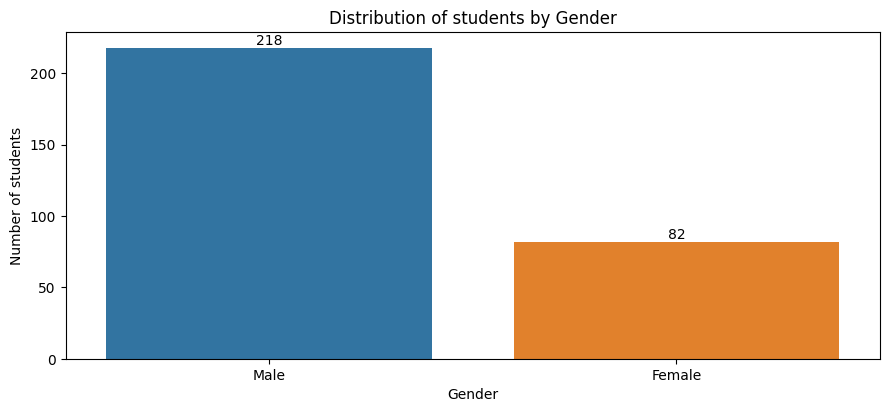

In [8]:
plt.figure(figsize=(9,4))
gender=enrollement.Gender.value_counts().reset_index()
ax = sns.barplot(gender,x='Gender',y='count',)
ax.bar_label(ax.containers[0])
plt.ylabel('Number of students')
plt.tight_layout()
plt.title('Distribution of students by Gender')
plt.show()   # male students have a high number in this cohort with a ratio of up to 2M:1F  

In [9]:
gender_dept=enrollement.groupby(['Department','Gender']).count().reset_index()
gender_dept

,Department,Gender,reg_no,Settlement Type,Status
0,AC,Female,13,13,13
1,AC,Male,27,27,27
2,AOL,Female,10,10,10
3,AOL,Male,16,16,16
4,APCS,Female,6,6,6
5,APCS,Male,34,34,34
6,IC,Female,9,9,9
7,IC,Male,33,33,33
8,INST,Female,8,8,8
9,INST,Male,31,31,31


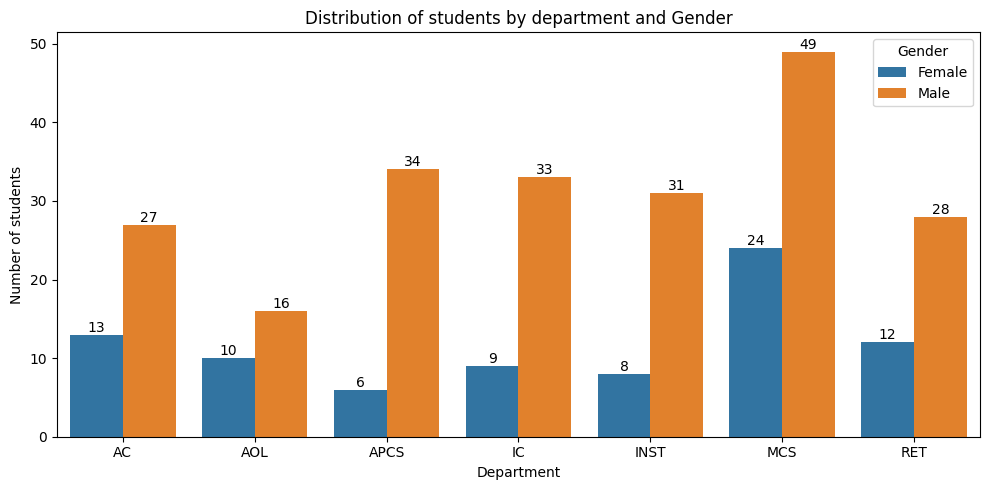

In [10]:
plt.figure(figsize=(10,5))
ax = sns.barplot(gender_dept,x='Department',y='reg_no',hue='Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.ylabel('Number of students')
plt.title('Distribution of students by department and Gender')
plt.tight_layout()
plt.show()

In [11]:
gender_status=enrollement.groupby(['Status','Gender']).count().reset_index()
gender_status

,Status,Gender,reg_no,Settlement Type,Department
0,Academic Leave,Male,9,9,9
1,Completed,Female,50,50,50
2,Completed,Male,101,101,101
3,Current,Female,25,25,25
4,Current,Male,91,91,91
5,Deceased,Male,1,1,1
6,Deregistered,Female,2,2,2
7,Deregistered,Male,7,7,7
8,Discontinued,Female,2,2,2
9,Discontinued,Male,3,3,3


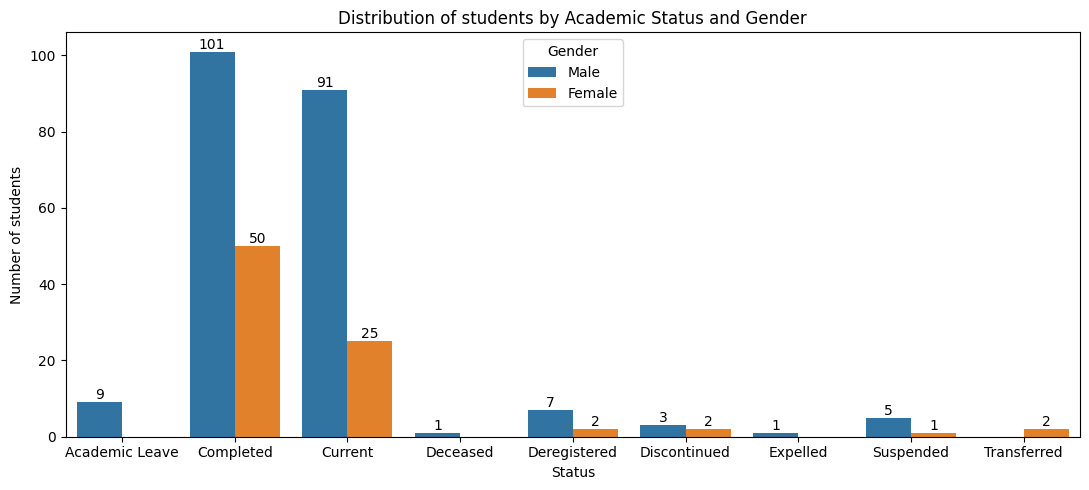

In [12]:
plt.figure(figsize=(11,5))
ax = sns.barplot(gender_status,x='Status',y='reg_no',hue='Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.ylabel('Number of students')
plt.title('Distribution of students by Academic Status and Gender')
plt.tight_layout()
plt.show()

Most of the students who did not manage to graduate repeated internally in the institution 

In [13]:
len(enrollement) - len(enrollement[enrollement.Status != 'Completed'])  # only 152 students out of the 305 enrolled students managed to graduate 

151

In [14]:
enrollement.reg_no 

0      SCT-251-001/2020
1      SCT-251-003/2020
2      SCT-251-004/2020
3      SCT-251-005/2020
4      SCT-251-006/2020
             ...       
295    SCT-258-003/2021
296    SCT-258-006/2021
297    SCT-258-016/2021
298    SCT-258-034/2021
299    SCT-258-040/2021
Name: reg_no, Length: 300, dtype: object

In [15]:
enrollement.reg_no.str.split('/').str[-1]

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
295    2021
296    2021
297    2021
298    2021
299    2021
Name: reg_no, Length: 300, dtype: object

In [16]:
enrollement['Year'] = enrollement.reg_no.str.split('/').str[-1]

enrollement.Year.value_counts()

Year
2020    268
2021     30
2019      2
Name: count, dtype: int64

### Performance Analysis 

## Year One

In [17]:
year_one=pd.read_excel(Data_path+'complete_year_one.xlsx').rename(columns={'Registration No.':'reg_no'})
year_one.columns

year_one.reg_no = year_one.reg_no.str.strip() 

In [18]:
#work study program students 
year1_work_study=['SCT-254-043/2020']

year_one["Year1_work_study"] = np.where(year_one.reg_no.isin(year1_work_study) ,1,0)
year_one.Year1_work_study.value_counts()

Year1_work_study
0    285
1      1
Name: count, dtype: int64

In [19]:
year_one.reg_no.nunique() , year_one.shape

(286, (286, 4))

In [20]:
students_of_interest= enrollement[(enrollement.Year != '2021') & (enrollement.Year != '2019')]

In [21]:
students_of_interest.shape , year_one.shape

#Theres is an imbalance betwee the enrolled students and first years resutls 

((268, 6), (286, 4))

In [22]:
year_one['Year'] = year_one['reg_no'].str.split('-').str.get(2).str.split('/').str.get(1)
year_one['Year'].value_counts()

Year
2020       281
2019         2
2018RA1      1
2033         1
2017RA1      1
Name: count, dtype: int64

In [23]:
students_of_interest.reg_no.value_counts()

reg_no
SCT-251-001/2020    1
SCT-255-028/2020    1
SCT-254-071/2020    1
SCT-254-072/2020    1
SCT-254-073/2020    1
                   ..
SCT-253-028/2020    1
SCT-253-030/2020    1
SCT-253-031/2020    1
SCT-253-033/2020    1
SCT-258-044/2020    1
Name: count, Length: 268, dtype: int64

In [24]:
students_of_interest.Year.value_counts()

Year
2020    268
Name: count, dtype: int64

In [25]:
cleaned_year_one = year_one[~(year_one['Year'] != '2020')]  # we only include 2020 students in our study

In [26]:
cleaned_year_one.reg_no.value_counts()

cleaned_year_one[cleaned_year_one.reg_no == 'SCT-256-021/2020']

,reg_no,GRADE,Remark,Year1_work_study,Year
190,SCT-256-021/2020,C,PASS,0,2020


In [27]:
cleaned_year_one[cleaned_year_one.reg_no.isin(students_of_interest.reg_no)]

,reg_no,GRADE,Remark,Year1_work_study,Year
0,SCT-252-001/2020,C,PASS,0,2020
1,SCT-252-002/2020,C,PASS,0,2020
2,SCT-252-003/2020,D,PASS,0,2020
3,SCT-252-004/2020,C,SUPP,0,2020
4,SCT-252-005/2020,C,PASS,0,2020
...,...,...,...,...,...
278,SCT-254-071/2020,B,PASS,0,2020
279,SCT-254-072/2020,B,SUPP,0,2020
280,SCT-254-073/2020,C,PASS,0,2020
284,SCT-254-079/2020,C,SUPP,0,2020


In [28]:
unenrolled_students= list(set(cleaned_year_one['reg_no']) - set(students_of_interest['reg_no']))

In [29]:
unenrolled_students

['SCT-253-017/2020',
 'SCT-254-078/2020',
 'SCT-256-027/2020',
 'SCT-254-059/2020',
 'SCT-255-042/2020',
 'SCT-258-036/2020',
 'SCT-254-077/2020',
 'SCT-254-054/2020',
 'SCT-254-076/2020',
 'SCT-253-006/2020',
 'SCT-258-015/2020',
 'SCT-253-022/2020',
 'SCT-258-045/2020',
 'SCT-255-032/2020',
 'SCT-256-026/2020',
 'SCT-251-039/2020']

In [30]:
 # this students were enrolled but no perfomance entry in their first year
no_performance=list(set(students_of_interest['reg_no']) - set(cleaned_year_one['reg_no']))

# we Chose to remove them 
students_of_interest=students_of_interest[~(students_of_interest.reg_no.isin(no_performance))]
students_of_interest

,reg_no,Settlement Type,Gender,Department,Status,Year
0,SCT-251-001/2020,GOK,Male,IC,Current,2020
1,SCT-251-003/2020,GOK,Male,IC,Current,2020
2,SCT-251-004/2020,GOK,Male,IC,Current,2020
3,SCT-251-005/2020,GOK,Male,IC,Current,2020
4,SCT-251-006/2020,GOK,Male,IC,Completed,2020
...,...,...,...,...,...,...
289,SCT-258-002/2020,GOK,Male,INST,Current,2020
290,SCT-258-001/2020,GOK,Male,INST,Current,2020
291,SCT-258-040/2020,GOK,Male,INST,Current,2020
292,SCT-258-043/2020,GOK,Male,INST,Current,2020


In [31]:
list(set(students_of_interest['reg_no']) - set(cleaned_year_one['reg_no']) )

[]

In [32]:
len(list(set(cleaned_year_one['reg_no']) & set(students_of_interest['reg_no'])))

265

In [33]:
unenrolled_students_df=pd.DataFrame(unenrolled_students,columns=['reg_no'])
unenrolled_students_df  #we see 18 students with first year results but not enrolled 

,reg_no
0,SCT-253-017/2020
1,SCT-254-078/2020
2,SCT-256-027/2020
3,SCT-254-059/2020
4,SCT-255-042/2020
5,SCT-258-036/2020
6,SCT-254-077/2020
7,SCT-254-054/2020
8,SCT-254-076/2020
9,SCT-253-006/2020


In [34]:
# We chose to enrolled this students who we have results for year one but they are not on the enrollement report 
# This could be SSP students joining later......
# collecting attributes for the students being enrolled ...
unenrolled_students_df['Settlement Type'] ='SSP'  
unenrolled_students_df

,reg_no,Settlement Type
0,SCT-253-017/2020,SSP
1,SCT-254-078/2020,SSP
2,SCT-256-027/2020,SSP
3,SCT-254-059/2020,SSP
4,SCT-255-042/2020,SSP
5,SCT-258-036/2020,SSP
6,SCT-254-077/2020,SSP
7,SCT-254-054/2020,SSP
8,SCT-254-076/2020,SSP
9,SCT-253-006/2020,SSP


In [35]:
list(unenrolled_students_df.reg_no.str.split('-').str.get(1).unique())

['253', '254', '256', '255', '258', '251']

In [36]:
def get_department(df):

    df['department_code']=df.reg_no.str.split('-').str.get(1)
    
    # unique_dept = list(unenrolled_students_df.reg_no.str.split('-').str.get(1).unique())
    
    dict={'254':"MCS" , '253':"APCS" ,'256':"RET",'258':"INST",'251':"IC",'255':"AOL",'252':"AC"}

    df['Department'] = df['department_code'].map(dict)
    
get_department(unenrolled_students_df)   

In [37]:
students_of_interest.Department.value_counts()

Department
MCS     65
IC      39
RET     39
AC      35
APCS    35
INST    32
AOL     20
Name: count, dtype: int64

In [38]:
unenrolled_students_df # department 

,reg_no,Settlement Type,department_code,Department
0,SCT-253-017/2020,SSP,253,APCS
1,SCT-254-078/2020,SSP,254,MCS
2,SCT-256-027/2020,SSP,256,RET
3,SCT-254-059/2020,SSP,254,MCS
4,SCT-255-042/2020,SSP,255,AOL
5,SCT-258-036/2020,SSP,258,INST
6,SCT-254-077/2020,SSP,254,MCS
7,SCT-254-054/2020,SSP,254,MCS
8,SCT-254-076/2020,SSP,254,MCS
9,SCT-253-006/2020,SSP,253,APCS


In [39]:

# Set a random seed for reproducibility
np.random.seed(42)

gender = ['Female', 'Male'] 
unenrolled_students_df['Gender']=np.random.choice(gender, len(unenrolled_students_df), p=[0.5, 0.5])
unenrolled_students_df['Gender'].value_counts()


Gender
Female    8
Male      8
Name: count, dtype: int64

In [40]:
unenrolled_students_df

,reg_no,Settlement Type,department_code,Department,Gender
0,SCT-253-017/2020,SSP,253,APCS,Female
1,SCT-254-078/2020,SSP,254,MCS,Male
2,SCT-256-027/2020,SSP,256,RET,Male
3,SCT-254-059/2020,SSP,254,MCS,Male
4,SCT-255-042/2020,SSP,255,AOL,Female
5,SCT-258-036/2020,SSP,258,INST,Female
6,SCT-254-077/2020,SSP,254,MCS,Female
7,SCT-254-054/2020,SSP,254,MCS,Male
8,SCT-254-076/2020,SSP,254,MCS,Male
9,SCT-253-006/2020,SSP,253,APCS,Male


In [41]:
students_of_interest.drop(columns=['Status','Year'],inplace=True)

In [42]:
unenrolled_students_df.drop(columns=['department_code'],inplace=True)

In [43]:
all_students=pd.concat([students_of_interest,unenrolled_students_df],axis=0).reset_index()

In [44]:
all_students.shape,year_one.shape

((281, 5), (286, 5))

In [45]:
all_students.tail()

,index,reg_no,Settlement Type,Gender,Department
276,11,SCT-253-022/2020,SSP,Male,APCS
277,12,SCT-258-045/2020,SSP,Male,INST
278,13,SCT-255-032/2020,SSP,Female,AOL
279,14,SCT-256-026/2020,SSP,Female,RET
280,15,SCT-251-039/2020,SSP,Female,IC


In [46]:
students_to_remove=list(set(year_one.reg_no) - set(all_students.reg_no))
students_to_remove # not student of interest based on the study. We therefore drop these students 

['SCT-252-021/2019',
 'SCT-253-015/2018RA1',
 'SCT-253-034/2019',
 'SCT-258-019/2033',
 'SCT-254-007/2017RA1']

In [47]:
year_one=year_one[~year_one['reg_no'].isin(students_to_remove)]

In [48]:
year_one.loc[year_one.reg_no == 'SCT-256-012/2020']

,reg_no,GRADE,Remark,Year1_work_study,Year
183,SCT-256-012/2020,C,SUPP,0,2020


In [49]:
all_students.shape , year_one.shape 

((281, 5), (281, 5))

In [50]:
list(set(year_one.reg_no) - set(all_students.reg_no))

[]

In [51]:
list(set(all_students.reg_no) - set(year_one.reg_no))

[]

In [52]:
combine_data=all_students.merge(year_one,on='reg_no').reset_index(drop=True)

In [53]:
combine_data.loc[combine_data.reg_no == 'SCT-256-012/2020']

,index,reg_no,Settlement Type,Gender,Department,GRADE,Remark,Year1_work_study,Year
215,242,SCT-256-012/2020,GOK,Male,RET,C,SUPP,0,2020


In [54]:
combine_data.Remark.value_counts().index

Index(['PASS', 'SUPP', '             PASS', '             SUPP',
       '6 FAILS, RP11', '6 FAILS,RP1', '7 FAILS,RP1', 'DEREGISTER, ABSCONDED',
       '7 FAILS, RP11', 'DEREGISTER,ABSCODED',
       '2 SPECIAL COMPASSIONATE GROUNDS', '8 FAILS,RP1', '6 FAILS, Rp11',
       '1 SPECIAL ,MEDICAL GROUNDS,6 FAILS', '6 FAILS, RP1',
       '1 SPECIAL, COMPASSIONATE GROUNDS', '7 FAILS, RP1',
       'SPECIAL COMPASSIONATE GROUNDS & FARS', '             PASS       ',
       '1 SPECIAL COMPASSIONATE GROUNDS, 2 SPECIALs, COMPASSIONATE GROUNDS',
       ' ACADEMIC LEAVE ON FINANCIAL', '9 FAILS, DISCONTINUE',
       'ACADEMIC LEAVE ON FINACIAL GROUNDS', 'ACADEMIC LEAVE', '9 FAILS',
       '1 SPECIAL MEDICAL GROUNDS, 4 FAILS', '8 SPECIAL-MEDICAL GROUNDS',
       'SUPE', 'FINANCIAL  GROUNDS ACADEMIC LEAVE ON',
       '             PASS           ', '        7 FAILS,RP1/',
       '2 SPECIAL MEDICAL GROUNDS, S'],
      dtype='object', name='Remark')

In [55]:
#cleaning the remark columns for uniformity

combine_data['Cleaned_Remark'] = combine_data['Remark'].str.strip().str.upper()
combine_data['Cleaned_Remark']=combine_data['Cleaned_Remark'].str.replace("SUPE","SUPP")
combine_data['Cleaned_Remark'] = combine_data['Cleaned_Remark'].str.replace("1 SPECIAL COMPASSIONATE GROUNDS, 2 SPECIALS, COMPASSIONATE GROUNDS","1 SPECIAL COMPASSIONATE GROUNDS")
combine_data['Cleaned_Remark']=combine_data['Cleaned_Remark'].str.replace("1 SPECIAL, COMPASSIONATE GROUNDS","1 SPECIAL COMPASSIONATE GROUNDS")
combine_data['Cleaned_Remark']=combine_data['Cleaned_Remark'].str.replace("DEREGISTER,ABSCODED","DEREGISTER, ABSCONDED")
combine_data['Cleaned_Remark']=combine_data['Cleaned_Remark'].str.replace("SPECIAL COMPASSIONATE GROUNDS & FARS","2 SPECIAL COMPASSIONATE GROUNDS")
combine_data['Cleaned_Remark']=combine_data['Cleaned_Remark'].str.replace("FINANCIAL  GROUNDS ACADEMIC LEAVE ON","ACADEMIC LEAVE")
combine_data['Cleaned_Remark']=combine_data['Cleaned_Remark'].str.replace("ACADEMIC LEAVE ON FINANCIAL","ACADEMIC LEAVE")
combine_data['Cleaned_Remark']=combine_data['Cleaned_Remark'].str.replace("ACADEMIC LEAVE ON FINACIAL GROUNDS","ACADEMIC LEAVE")


rp1_list=['7 FAILS,RP1','6 FAILS, RP1','7 FAILS, RP1','8 FAILS,RP1','9 FAILS, DISCONTINUE','RP1/','9 FAILS','6 FAILS,RP1', '7 FAILS, RP11','RP11', '7 FAILS,RP1/']

for remark in rp1_list:
    combine_data['Cleaned_Remark'] = combine_data['Cleaned_Remark'].str.replace(remark,"RP1")
combine_data.Cleaned_Remark.value_counts().index

Index(['PASS', 'SUPP', 'RP1', 'ACADEMIC LEAVE', 'DEREGISTER, ABSCONDED',
       '1 SPECIAL COMPASSIONATE GROUNDS', '2 SPECIAL COMPASSIONATE GROUNDS',
       '8 SPECIAL-MEDICAL GROUNDS', '1 SPECIAL MEDICAL GROUNDS, 4 FAILS',
       '2 SPECIAL MEDICAL GROUNDS, S', '1 SPECIAL ,MEDICAL GROUNDS,6 FAILS'],
      dtype='object', name='Cleaned_Remark')

In [56]:
combine_data[combine_data.Cleaned_Remark ==  '1 SPECIAL COMPASSIONATE GROUNDS, 2 SPECIALS, COMPASSIONATE GROUNDS' ]

,index,reg_no,Settlement Type,Gender,Department,GRADE,Remark,Year1_work_study,Year,Cleaned_Remark


In [57]:
combine_data['year1_supplementary'] =  np.where(combine_data['Cleaned_Remark'] == 'SUPP',1,0)
combine_data.year1_supplementary.value_counts()

year1_supplementary
0    160
1    121
Name: count, dtype: int64

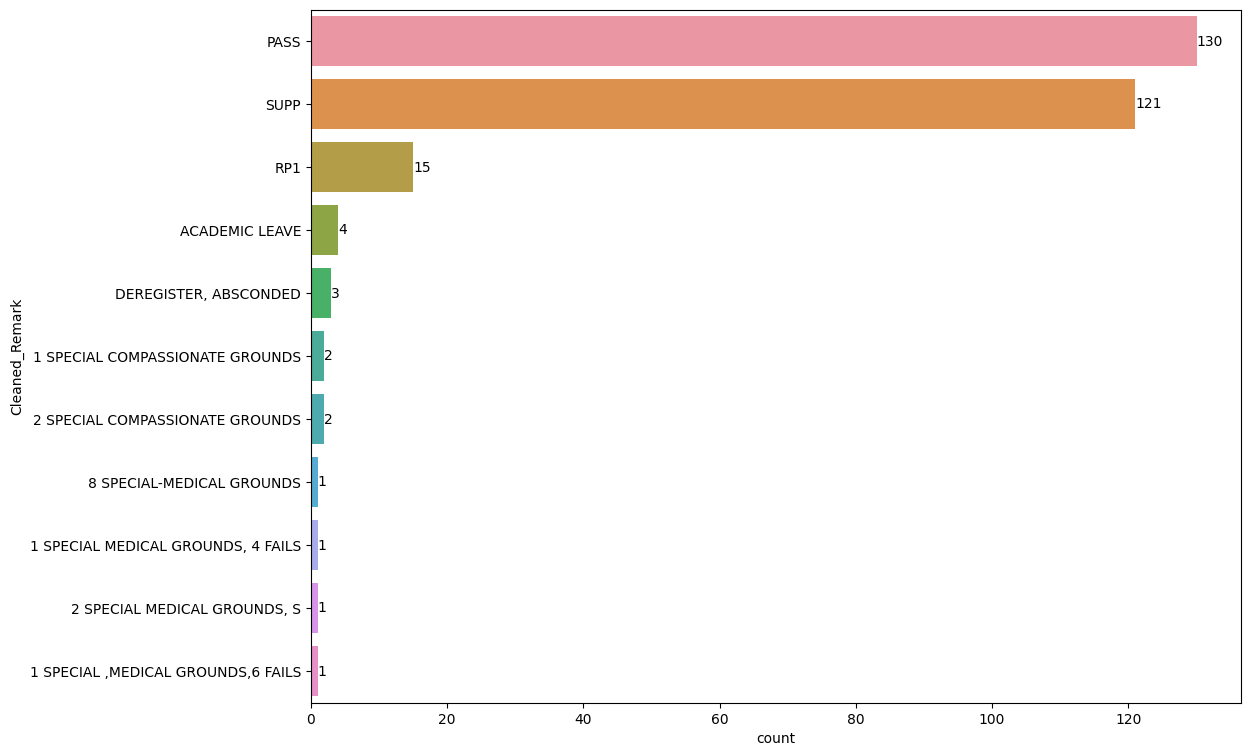

In [58]:
plt.figure(figsize=(12,9))

ax =sns.barplot(combine_data.Cleaned_Remark.value_counts().reset_index(),x='count',y='Cleaned_Remark')
ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])

plt.show()

In [59]:
combine_data.groupby(['Department', 'Gender']).count().reset_index()

,Department,Gender,index,reg_no,Settlement Type,GRADE,Remark,Year1_work_study,Year,Cleaned_Remark,year1_supplementary
0,AC,Female,11,11,11,11,11,11,11,11,11
1,AC,Male,24,24,24,24,24,24,24,24,24
2,AOL,Female,9,9,9,9,9,9,9,9,9
3,AOL,Male,13,13,13,13,13,13,13,13,13
4,APCS,Female,7,7,7,7,7,7,7,7,7
5,APCS,Male,31,31,31,31,31,31,31,31,31
6,IC,Female,9,9,9,9,9,9,9,9,9
7,IC,Male,31,31,31,31,31,31,31,31,31
8,INST,Female,8,8,8,8,8,8,8,8,8
9,INST,Male,27,27,27,27,27,27,27,27,27


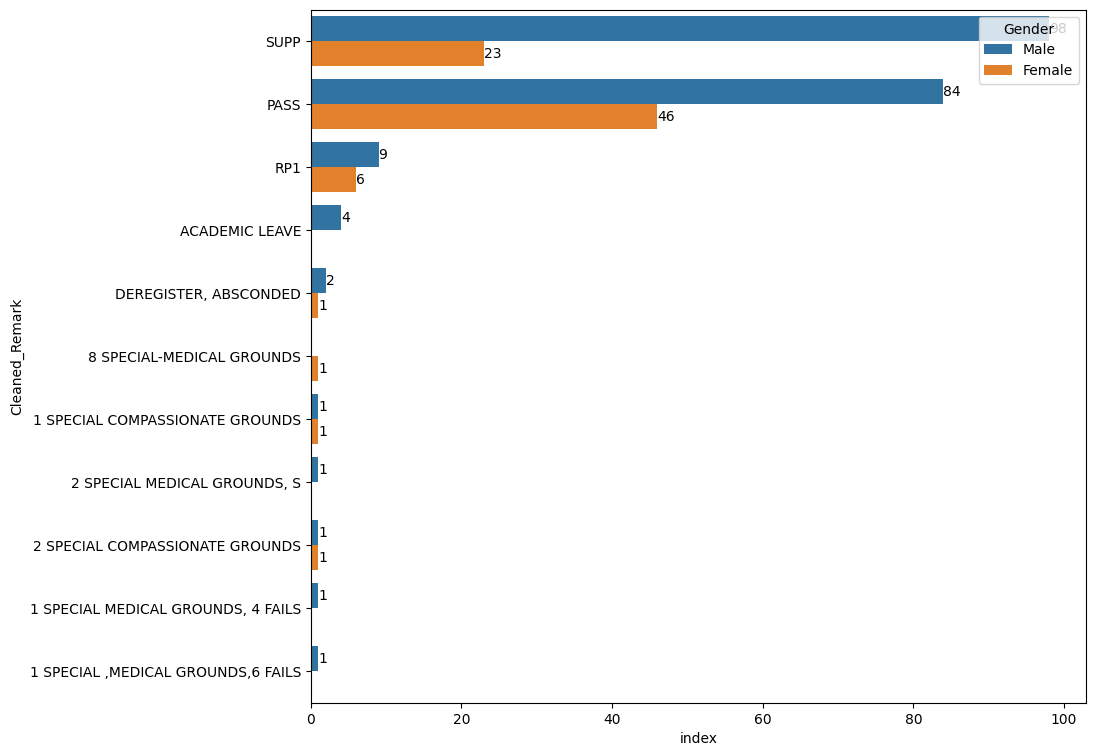

In [60]:
plt.figure(figsize=(10,9))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(combine_data.groupby(['Cleaned_Remark', 'Gender']).count().sort_values(by='index',ascending=False).reset_index(),x='index',y='Cleaned_Remark',hue='Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

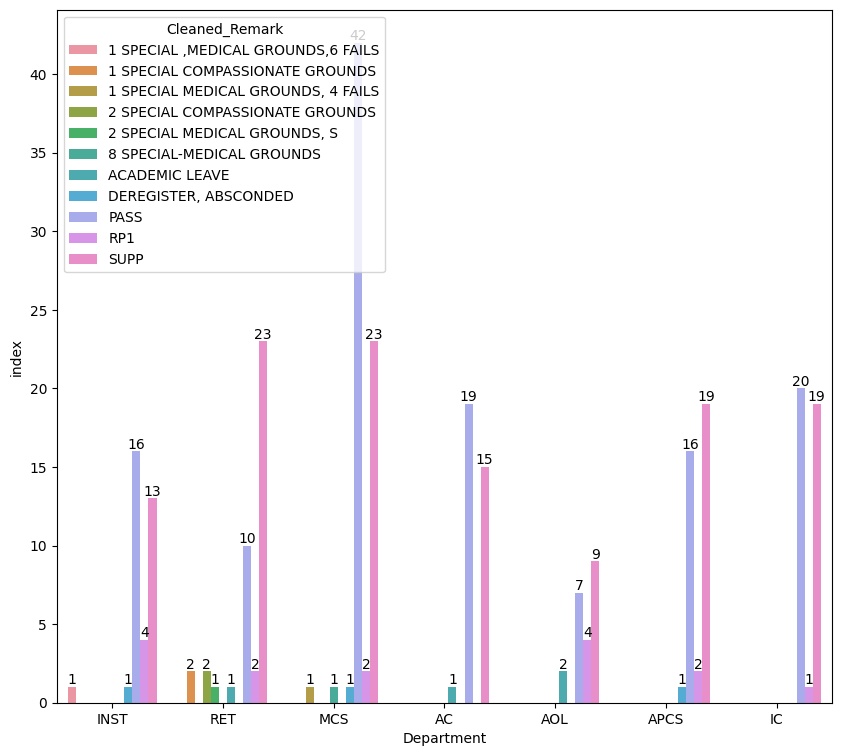

In [61]:
plt.figure(figsize=(10,9))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(combine_data.groupby(['Cleaned_Remark', 'Department']).count().reset_index(),y='index',x='Department',hue='Cleaned_Remark')

for num in range(len(ax.containers)):
    ax.bar_label(ax.containers[num])

plt.show()

In [62]:
combine_data.GRADE = combine_data.GRADE.str.strip()
combine_data.GRADE.value_counts()

GRADE
C    137
D     69
B     51
E     19
A      5
Name: count, dtype: int64

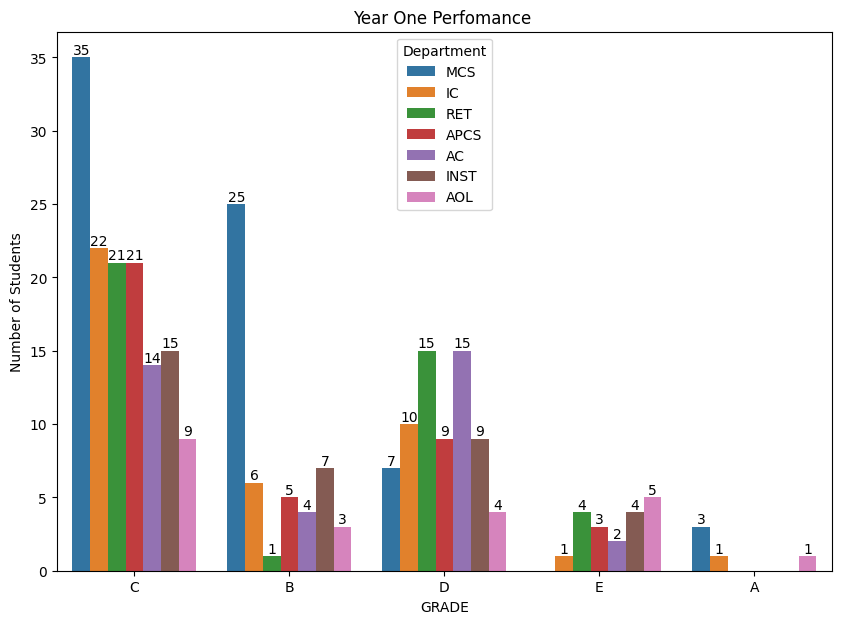

In [63]:
plt.figure(figsize=(10,7))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(combine_data.groupby(['Department', 'GRADE']).count().sort_values(by='index',ascending=False).reset_index(),y='index',x='GRADE',hue='Department')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title("Year One Perfomance ")
plt.ylabel('Number of Students')
plt.xlabel('GRADE')
plt.show()

In [64]:
combine_data.Cleaned_Remark.value_counts().index

Index(['PASS', 'SUPP', 'RP1', 'ACADEMIC LEAVE', 'DEREGISTER, ABSCONDED',
       '1 SPECIAL COMPASSIONATE GROUNDS', '2 SPECIAL COMPASSIONATE GROUNDS',
       '8 SPECIAL-MEDICAL GROUNDS', '1 SPECIAL MEDICAL GROUNDS, 4 FAILS',
       '2 SPECIAL MEDICAL GROUNDS, S', '1 SPECIAL ,MEDICAL GROUNDS,6 FAILS'],
      dtype='object', name='Cleaned_Remark')

In [65]:
first_year_dropouts=['RP1', 'DEREGISTER, ABSCONDED', 'ACADEMIC LEAVE',]


combine_data.loc[combine_data['Cleaned_Remark'].isin(first_year_dropouts), "Time"] = 1  #These students only lasted for 1 year in the institution 

In [66]:
expected_second_years=combine_data[combine_data.Time.isnull()]  # expecting 259 students in the second year 
expected_second_years.shape

(259, 12)

In [67]:
combine_data.rename(columns={"GRADE":"Year_one","Cleaned_Remark":"Year1_remark"},inplace=True)

In [68]:
combine_data[(combine_data.Year1_remark == 'RP1') & (combine_data.Time.isna())]

,index,reg_no,Settlement Type,Gender,Department,Year_one,Remark,Year1_work_study,Year,Year1_remark,year1_supplementary,Time


In [69]:
expected_second_years.loc[expected_second_years.reg_no == 'SCT-256-012/2020']

,index,reg_no,Settlement Type,Gender,Department,GRADE,Remark,Year1_work_study,Year,Cleaned_Remark,year1_supplementary,Time
215,242,SCT-256-012/2020,GOK,Male,RET,C,SUPP,0,2020,SUPP,1,NaN


In [70]:
combine_data.loc[(combine_data.Year_one == "D") & (combine_data.Year1_remark == "PASS")]

,index,reg_no,Settlement Type,Gender,Department,Year_one,Remark,Year1_work_study,Year,Year1_remark,year1_supplementary,Time
3,3,SCT-251-005/2020,GOK,Male,IC,D,PASS,0,2020,PASS,0,NaN
41,44,SCT-252-003/2020,GOK,Female,AC,D,PASS,0,2020,PASS,0,NaN
46,49,SCT-252-008/2020,GOK,Female,AC,D,PASS,0,2020,PASS,0,NaN
55,58,SCT-252-020/2020,GOK,Male,AC,D,PASS,0,2020,PASS,0,NaN
56,59,SCT-252-021/2020,GOK,Male,AC,D,PASS,0,2020,PASS,0,NaN
59,62,SCT-252-025/2020,GOK,Male,AC,D,PASS,0,2020,PASS,0,NaN


### Year Two 

In [71]:
year_two=pd.read_excel(Data_path+'complete_year_two.xlsx').rename(columns={'Registration No.':"reg_no",'Remarks':"Year2_remark"})
year_two[year_two.reg_no == 'SCT-255-030/2020']

,reg_no,GRADE,Year2_remark
217,SCT-255-030/2020,B,PASS


In [72]:
year2_work_study = ['SCT-251-023/2020','SCT-252-023/2020','SCT-251-031/2020','SCT-254-072/2020',
                    'SCT-254-068/2020','SCT-252-026/2020']

year_two['Year2_work_study'] = np.where(year_two.reg_no.isin(year2_work_study),1,0)
year_two.Year2_work_study.value_counts()

Year2_work_study
0    254
1      6
Name: count, dtype: int64

In [73]:
set(year2_work_study) - set(year_two.reg_no)

set()

In [74]:
year_two.reg_no = year_two.reg_no.str.strip()

In [75]:
year_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   reg_no            260 non-null    object
 1   GRADE             260 non-null    object
 2   Year2_remark      168 non-null    object
 3   Year2_work_study  260 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 8.3+ KB


In [76]:
year_two['Year'] = year_two['reg_no'].str.split('-').str.get(2).str.split('/').str.get(1)
year_two['Year'].value_counts()

Year
2020        247
2019RA2       7
2019          2
20198p11      1
2019RP11      1
2018Rp11      1
2019RAZ       1
Name: count, dtype: int64

In [77]:
year_two=year_two[~(year_two.Year != '2020')]
year_two.shape

(247, 5)

In [78]:
year_two[year_two.reg_no == 'SCT-253-041/2020']

,reg_no,GRADE,Year2_remark,Year2_work_study,Year
196,SCT-253-041/2020,C,NaN,0,2020


In [79]:
year_two.reg_no.value_counts()

reg_no
SCT-256-001/2020    1
SCT-258-029/2020    1
SCT-258-031/2020    1
SCT-258-032/2020    1
SCT-258-035/2020    1
                   ..
SCT-254-062/2020    1
SCT-254-063/2020    1
SCT-254-064/2020    1
SCT-254-065/2020    1
SCT-252-052/2020    1
Name: count, Length: 247, dtype: int64

In [80]:
unique_expected_second_years=set(expected_second_years.reg_no) - set(year_two.reg_no)

In [81]:
unique_year_two=set(year_two.reg_no) - set(expected_second_years.reg_no)
len(unique_expected_second_years-unique_year_two)

14

In [82]:
lost_for_study = unique_expected_second_years-unique_year_two ## Students lost between first year and second year (present results for first year with no results in second year )

lost_for_study

{'SCT-251-012/2020',
 'SCT-251-022/2020',
 'SCT-251-034/2020',
 'SCT-251-039/2020',
 'SCT-252-010/2020',
 'SCT-252-027/2020',
 'SCT-253-006/2020',
 'SCT-253-016/2020',
 'SCT-253-019/2020',
 'SCT-253-056/2020',
 'SCT-254-073/2020',
 'SCT-254-080/2020',
 'SCT-256-032/2020',
 'SCT-256-041/2020'}

In [83]:
year_two[year_two.reg_no == 'SCT-253-041/2020']

,reg_no,GRADE,Year2_remark,Year2_work_study,Year
196,SCT-253-041/2020,C,NaN,0,2020


In [84]:
combine_data.loc[combine_data.reg_no.isin(lost_for_study), "Time"] = 1  ## we assume they survived till year one 

In [85]:
year_two = year_two[~year_two.reg_no.isin(set(year_two.reg_no) - set(combine_data[combine_data.Time.isna()].reg_no))]

In [86]:
combine_data[combine_data.Time.isna()].shape, year_two.shape

((245, 12), (245, 5))

In [87]:
combine_data.loc[combine_data.reg_no.isin(set(year_two.reg_no) - set(combine_data[combine_data.Time.isna()].reg_no)), "Time"] = 1

In [88]:
set(year_two.reg_no) - set(combine_data[combine_data.Time.isna()].reg_no)

set()

In [89]:
combine_data[combine_data.reg_no == 'SCT-255-030/2020']

,index,reg_no,Settlement Type,Gender,Department,Year_one,Remark,Year1_work_study,Year,Year1_remark,year1_supplementary,Time
181,202,SCT-255-030/2020,GOK,Female,AOL,B,PASS,0,2020,PASS,0,NaN


In [90]:
year_two[year_two.reg_no == 'SCT-252-005/2020']

,reg_no,GRADE,Year2_remark,Year2_work_study,Year
229,SCT-252-005/2020,C,NaN,0,2020


In [91]:
year_two[year_two.Year2_remark.isnull()]

,reg_no,GRADE,Year2_remark,Year2_work_study,Year
103,SCT-251-001/2020,D,NaN,0,2020
104,SCT-251-003/2020,D,NaN,0,2020
107,SCT-251-006/2020,C,NaN,0,2020
108,SCT-251-007/2020,B,NaN,0,2020
109,SCT-251-008/2020,C,NaN,0,2020
...,...,...,...,...,...
254,SCT-252-038/2020,D,NaN,0,2020
256,SCT-252-040/2020,C,NaN,0,2020
257,SCT-252-041/2020,B,NaN,0,2020
258,SCT-252-043/2020,D,NaN,0,2020


In [92]:
year_two.Year2_remark.value_counts().index

Index(['PASS', 'SUPP', 'ACADEMIC LEAVE FINANCIAL GROUNDS',
       'DEREGISTER, ABSCONDED', 'DEREGISTER, ABSCENDED', 'DISCONTINUE',
       'SPECIAL FINANCIAL GROUNDS', 'LEAVE FIN. GROUNDS',
       'ACADEMIC LEAVE-FINANCIAL GROUNDS', 'Rpy',
       'ACADEMIC SLAVE FINANCIAL GROUNDS', ' ',
       'SPECIAL EVALS MEDICAL KHOUNDS', 'DEREGISTER ABSCONDED',
       'SPECIAL ON FINANCIAL', 'RP2', 'SUSPENDED, EMPREG CHA 2203'],
      dtype='object', name='Year2_remark')

In [93]:
year_two['Year2_remark'] = year_two['Year2_remark'].str.strip().str.upper()
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("ACADEMIC LEAVE FINANCIAL GROUNDS","ACADEMIC LEAVE")
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("ACADEMIC LEAVE-FINANCIAL GROUNDS","ACADEMIC LEAVE")
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("LEAVE FIN. GROUNDS","ACADEMIC LEAVE")
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("ACADEMIC SLAVE FINANCIAL GROUNDS","ACADEMIC LEAVE")
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("DEREGISTER, ABSCENDED","DEREGISTER, ABSCONDED")
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("DEREGISTER ABSCONDED","DEREGISTER, ABSCONDED")
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("SUSPENDED, EMPREG CHA 2203","SESPENDED, EXAM IRREGULARITY")
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("RPY","RP2")
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("SPECIAL ON FINANCIAL","SPECIAL FINANCIAL GROUNDS")
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("SPECIAL EVALS MEDICAL KHOUNDS","SPECIAL ON MEDICAL GROUNDS")

In [94]:
year_two.Year2_remark.value_counts().index

Index(['PASS', 'SUPP', 'ACADEMIC LEAVE', 'DEREGISTER, ABSCONDED', 'RP2',
       'SPECIAL FINANCIAL GROUNDS', 'DISCONTINUE',
       'SPECIAL ON MEDICAL GROUNDS', '', 'SESPENDED, EXAM IRREGULARITY'],
      dtype='object', name='Year2_remark')

In [95]:
year_two['Year2_supplementary'] =  np.where(year_two['Year2_remark'] == 'SUPP',1,0)
year_two.Year2_supplementary.value_counts()

Year2_supplementary
0    180
1     65
Name: count, dtype: int64

In [96]:
year_two.loc[(year_two.GRADE == "D") & (year_two.Year2_remark == "PASS")]

,reg_no,GRADE,Year2_remark,Year2_work_study,Year,Year2_supplementary
18,SCT-256-023/2020,D,PASS,0,2020,0
46,SCT-254-010/2020,D,PASS,0,2020,0
56,SCT-254-020/2020,D,PASS,0,2020,0
74,SCT-254-042/2020,D,PASS,0,2020,0


In [97]:
year_two[year_two.Year2_remark.isna()].GRADE.value_counts()

pass_grade=["A","B","C","D"]


year_two.loc[(year_two.GRADE == "A") | (year_two.GRADE == "B") | (year_two.GRADE == "C") & (year_two.Year2_remark.isna()) ,"Year2_remark"] = "PASS"
year_two.loc[(year_two.GRADE == "D") & (year_two.Year2_remark.isna()),"Year2_remark"] = "SUPP"
year_two.loc[(year_two.GRADE == "E") & (year_two.Year2_remark.isna()),"Year2_remark"] = "SUPP"

In [98]:
year_two.Year2_remark.value_counts()

Year2_remark
PASS                          123
SUPP                          102
ACADEMIC LEAVE                  7
DEREGISTER, ABSCONDED           6
RP2                             2
SPECIAL FINANCIAL GROUNDS       2
DISCONTINUE                     2
SPECIAL ON MEDICAL GROUNDS      1
Name: count, dtype: int64

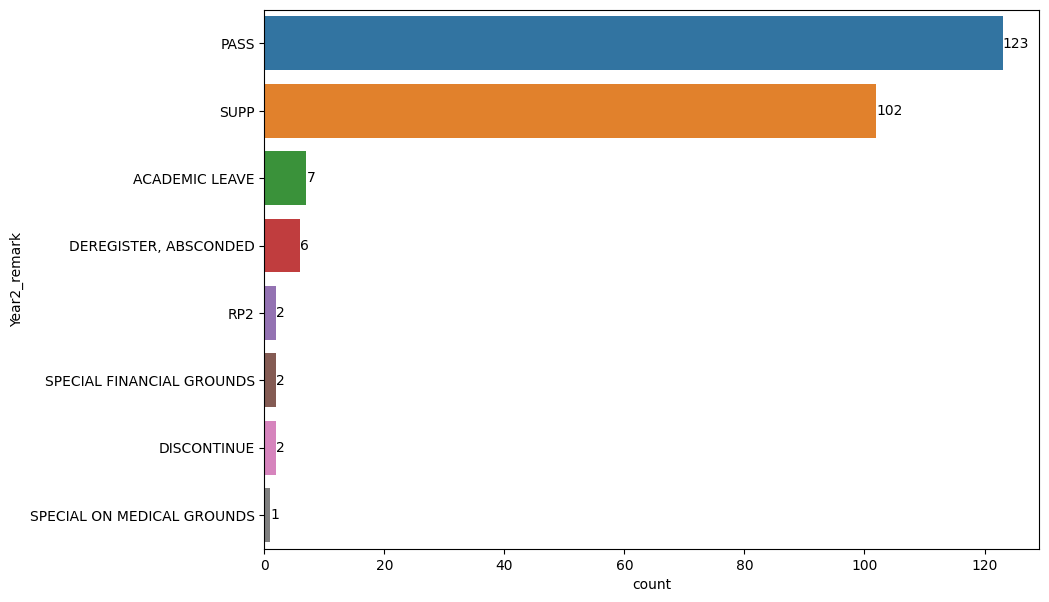

In [99]:
plt.figure(figsize=(10,7))

ax =sns.barplot(year_two.Year2_remark.value_counts().reset_index(),x='count',y='Year2_remark')
ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])

plt.show()

In [100]:
combined_year_two = pd.merge(combine_data,year_two,on='reg_no',how='left').rename(columns={"GRADE":"Year_two"}).drop(columns=['Year_y','Year_x'],axis=1)

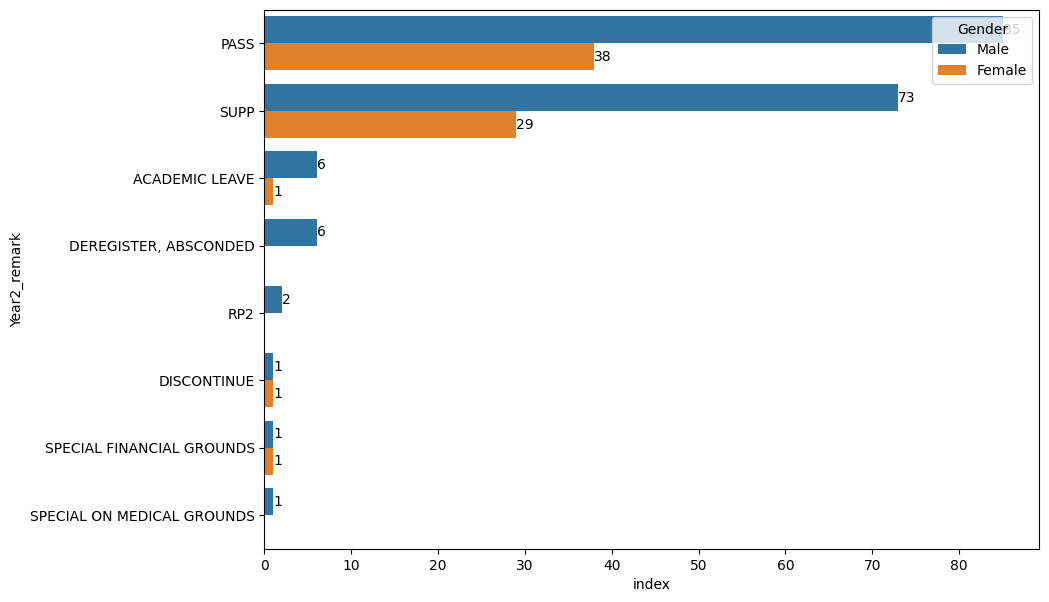

In [101]:
plt.figure(figsize=(10,7))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(combined_year_two.groupby(['Year2_remark', 'Gender']).count().sort_values(by='index',ascending=False).reset_index(),x='index',y='Year2_remark',hue='Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [102]:
combined_year_two[combined_year_two.Year_two == '8' ]

combined_year_two.loc[combined_year_two.Year_two == '8' , "Year_two"] = "B"

# estimate perfomance based on previous and future results 
combined_year_two.loc[combined_year_two.Year_two == '#VALUE!', "Year_two"] = "C"
combined_year_two.loc[combined_year_two.Year_two == 'VALUE', "Year_two"] = "B"

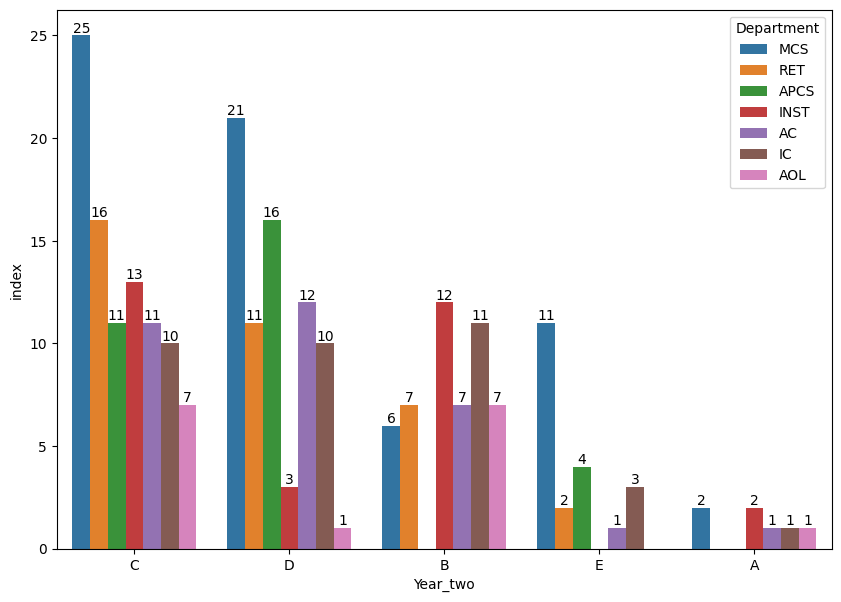

In [103]:
plt.figure(figsize=(10,7))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(combined_year_two.groupby(['Department', 'Year_two']).count().sort_values(by='index',ascending=False).reset_index(),y='index',x='Year_two',hue='Department')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.show()

In [104]:
combined_year_two.shape

(281, 15)

In [105]:
combined_year_two[combined_year_two.reg_no == "SCT-255-030/2020"]

,index,reg_no,Settlement Type,Gender,Department,Year_one,Remark,Year1_work_study,Year1_remark,year1_supplementary,Time,Year_two,Year2_remark,Year2_work_study,Year2_supplementary
181,202,SCT-255-030/2020,GOK,Female,AOL,B,PASS,0,PASS,0,NaN,B,PASS,0.0,0.0


In [106]:
combined_year_two.Year_two.value_counts().index

Index(['C', 'D', 'B', 'E', 'A'], dtype='object', name='Year_two')

In [107]:
combined_year_two.Time.isnull().sum()

245

In [108]:
combined_year_two.isnull().sum()

index                    0
reg_no                   0
Settlement Type          0
Gender                   0
Department               0
Year_one                 0
Remark                   0
Year1_work_study         0
Year1_remark             0
year1_supplementary      0
Time                   245
Year_two                36
Year2_remark            36
Year2_work_study        36
Year2_supplementary     36
dtype: int64

In [109]:
combined_year_two[combined_year_two.Year_two.isnull()]  # first year drop outs 

,index,reg_no,Settlement Type,Gender,Department,Year_one,Remark,Year1_work_study,Year1_remark,year1_supplementary,Time,Year_two,Year2_remark,Year2_work_study,Year2_supplementary
10,10,SCT-251-012/2020,GOK,Male,IC,C,SUPP,0,SUPP,1,1.0,NaN,NaN,NaN,NaN
20,20,SCT-251-022/2020,GOK,Male,IC,C,PASS,0,PASS,0,1.0,NaN,NaN,NaN,NaN
29,29,SCT-251-034/2020,GOK,Male,IC,B,PASS,0,PASS,0,1.0,NaN,NaN,NaN,NaN
38,38,SCT-251-048/2020,GOK,Male,IC,E,"7 FAILS,RP1/",0,RP1,0,1.0,NaN,NaN,NaN,NaN
47,50,SCT-252-010/2020,GOK,Male,AC,D,SUPP,0,SUPP,1,1.0,NaN,NaN,NaN,NaN
57,60,SCT-252-022/2020,GOK,Male,AC,E,FINANCIAL GROUNDS ACADEMIC LEAVE ON,0,ACADEMIC LEAVE,0,1.0,NaN,NaN,NaN,NaN
61,64,SCT-252-027/2020,GOK,Female,AC,B,SUPP,0,SUPP,1,1.0,NaN,NaN,NaN,NaN
77,85,SCT-253-005/2020,GOK,Male,APCS,E,"DEREGISTER, ABSCONDED",0,"DEREGISTER, ABSCONDED",0,1.0,NaN,NaN,NaN,NaN
84,92,SCT-253-016/2020,GOK,Male,APCS,C,SUPP,0,SUPP,1,1.0,NaN,NaN,NaN,NaN
86,94,SCT-253-019/2020,GOK,Male,APCS,D,SUPP,0,SUPP,1,1.0,NaN,NaN,NaN,NaN


In [110]:
combined_year_two.Year2_remark.value_counts().index

Index(['PASS', 'SUPP', 'ACADEMIC LEAVE', 'DEREGISTER, ABSCONDED',
       'DISCONTINUE', 'RP2', 'SPECIAL FINANCIAL GROUNDS',
       'SPECIAL ON MEDICAL GROUNDS'],
      dtype='object', name='Year2_remark')

In [111]:
Second_year_dropouts = ['DISCONTINUE','ACADEMIC LEAVE','DEREGISTER, ABSCONDED','RP2']

combined_year_two.loc[combined_year_two.Year2_remark.isin(Second_year_dropouts),"Time"] = 2

In [112]:
combined_year_two.isnull().sum() ## we expect 228 students of interest in 3rd year

index                    0
reg_no                   0
Settlement Type          0
Gender                   0
Department               0
Year_one                 0
Remark                   0
Year1_work_study         0
Year1_remark             0
year1_supplementary      0
Time                   228
Year_two                36
Year2_remark            36
Year2_work_study        36
Year2_supplementary     36
dtype: int64

## Year Three

In [113]:
year_three=pd.read_excel(Data_path+'complete_year_three.xlsx').rename(columns={"Grade":"Year_three","Registration No.":"reg_no"})
year_three['reg_no'] = year_three['reg_no'].str.strip()
year_three['Remark'] = year_three['Remark'].str.strip()
year_three.reg_no.value_counts()

reg_no
SCT-255-014/2019        2
SCT-254-001/2020        1
SCT-256-030/2020        1
SCT-256-015/2018        1
SCT-256-015/2019Rp11    1
                       ..
SCT-251-001/2020        1
SCT-251-003/2020        1
SCT-251-006/2020        1
SCT-251-007/2020        1
SCT-253-053/2020        1
Name: count, Length: 230, dtype: int64

In [114]:
year3_work_study=['SCT-251-024/2020','SCT-252-023/2020','SCT-251-031/2020','SCT-251-025/2020','SCT-258-014/2020','SCT-256-040/2020',
                  'SCT-252-027/2020','SCT-252-041/2020','SCT-252-026/2020','SCT-258-035/2020','SCT-251-023/2020','SCT-256-031/2020',
                  'SCT-252-043/2020','SCT-252-022/2020','SCT-258-007/2020']
len(year3_work_study)

15

In [115]:
year_three['Year3_work_study'] = np.where(year_three.reg_no.isin(year3_work_study),1,0)
year_three.Year3_work_study.value_counts()

Year3_work_study
0    221
1     10
Name: count, dtype: int64

In [116]:
 set(year3_work_study) - set(year_three[year_three.Year3_work_study == 1].reg_no)

{'SCT-251-025/2020',
 'SCT-252-022/2020',
 'SCT-252-027/2020',
 'SCT-252-041/2020',
 'SCT-252-043/2020'}

In [117]:
combined_year_two[combined_year_two.reg_no.isin( set(year3_work_study) - set(year_three[year_three.Year3_work_study == 1].reg_no))]

,index,reg_no,Settlement Type,Gender,Department,Year_one,Remark,Year1_work_study,Year1_remark,year1_supplementary,Time,Year_two,Year2_remark,Year2_work_study,Year2_supplementary
23,23,SCT-251-025/2020,GOK,Male,IC,C,SUPP,0,SUPP,1,NaN,B,PASS,0.0,0.0
57,60,SCT-252-022/2020,GOK,Male,AC,E,FINANCIAL GROUNDS ACADEMIC LEAVE ON,0,ACADEMIC LEAVE,0,1.0,NaN,NaN,NaN,NaN
61,64,SCT-252-027/2020,GOK,Female,AC,B,SUPP,0,SUPP,1,1.0,NaN,NaN,NaN,NaN
71,74,SCT-252-041/2020,GOK,Female,AC,B,PASS,0,PASS,0,NaN,B,PASS,0.0,0.0
72,75,SCT-252-043/2020,GOK,Female,AC,C,PASS,0,PASS,0,NaN,D,SUPP,0.0,0.0


In [118]:
year_three.Remark.value_counts()


Remark
PASS                                           125
SUPP                                            79
ACADEMIC LEAVE FINANCIAL GROUNDS                 3
Rp31                                             2
ACADEMIC LEAVE-FINANCIAL GROUNDS                 2
SPECIALS, MEDICAL GROUNDS                        1
SUPENDED EXAM IRRG-CHI 2308                      1
1 SPECIAL MEDICAL GROUNDS 3 FAILS                1
GROUNDS 4 FAIL                                   1
DEREGISTER, ABSCONDED                            1
2.SPECIAL FINANCIAL                              1
SUSPENDED-EXAM IRREG                             1
8 SPECIAL EXAMS, FINANCIAL GROUNDS, 2 FAILS      1
1 SPECIAL EXAM, 5 FAILS                          1
3 SPECIALS FINANCIAL GROUNDS, 4 FAILS            1
1 SPECIAL, FINANCIAL GROUNDS, 1 FAIL             1
SUSPENDED EXAM IRRG O 2308                       1
SUSPENDED-EXAM IRREG.                            1
1 SPECIAL FINANCIAL GROUNDS, 6 FAILS             1
4 specials, financial gr

In [119]:
year_three['Year'] = year_three.reg_no.str.split('-').str.get(2).str.split('/').str.get(1)
year_three['Year'] = year_three['Year'].str.strip()

In [120]:
year_three.Year.value_counts()

Year
2020           199
2019            17
2018             6
2019RA3          2
2017             1
2015RA2          1
2015             1
2019rP3DRAJ      1
2013RA2RA3       1
2019Rp21         1
2019Rp11         1
Name: count, dtype: int64

In [121]:
year_three = year_three[~(year_three.Year != '2020')]

In [122]:
len(set(year_three.reg_no) - set(combined_year_two[combined_year_two.Time.isna()].reg_no))

0

In [123]:
combined_year_two[combined_year_two.reg_no.isin(set(year_three.reg_no) - set(combined_year_two[combined_year_two.Time.isna()].reg_no))]

,index,reg_no,Settlement Type,Gender,Department,Year_one,Remark,Year1_work_study,Year1_remark,year1_supplementary,Time,Year_two,Year2_remark,Year2_work_study,Year2_supplementary


In [124]:
year_three[year_three.reg_no.isin(set(year_three.reg_no) - set(combined_year_two[combined_year_two.Time.isna()].reg_no))].reg_no

Series([], Name: reg_no, dtype: object)

In [125]:
year_three[year_three.reg_no == "SCT-255-30/2020"]

,reg_no,Year_three,Remark,Year3_work_study,Year


In [126]:
combined_year_two[combined_year_two.reg_no == "SCT-255-30/2020"]

,index,reg_no,Settlement Type,Gender,Department,Year_one,Remark,Year1_work_study,Year1_remark,year1_supplementary,Time,Year_two,Year2_remark,Year2_work_study,Year2_supplementary


In [127]:
combined_year_two[combined_year_two.reg_no == "SCT-255-030/2020"]

,index,reg_no,Settlement Type,Gender,Department,Year_one,Remark,Year1_work_study,Year1_remark,year1_supplementary,Time,Year_two,Year2_remark,Year2_work_study,Year2_supplementary
181,202,SCT-255-030/2020,GOK,Female,AOL,B,PASS,0,PASS,0,NaN,B,PASS,0.0,0.0


In [128]:
year_three.Remark.value_counts()

Remark
PASS                                     115
SUPP                                      64
ACADEMIC LEAVE FINANCIAL GROUNDS           3
SPECIALS, MEDICAL GROUNDS                  1
SUPENDED EXAM IRRG-CHI 2308                1
1 SPECIAL MEDICAL GROUNDS 3 FAILS          1
GROUNDS 4 FAIL                             1
Rp31                                       1
2.SPECIAL FINANCIAL                        1
SUSPENDED-EXAM IRREG                       1
ACADEMIC LEAVE-FINANCIAL GROUNDS           1
3 SPECIALS FINANCIAL GROUNDS, 4 FAILS      1
1 SPECIAL, FINANCIAL GROUNDS, 1 FAIL       1
SUSPENDED-EXAM IRREG.                      1
1 SPECIAL FINANCIAL GROUNDS, 6 FAILS       1
4 specials, financial grounds, 1 fail      1
SPECIAL DISCIPLINARY GROUNDS, 5 FAILS      1
DISCONTINUE                                1
1 SPECIAL, FINANCIAL GROUNDS               1
SUSPENDED EXAM IRRG O 2308                 1
Name: count, dtype: int64

In [129]:
year_three['Remark'] = year_three['Remark'].str.strip().str.upper()
year_three['Remark']=year_three['Remark'].str.replace("ACADEMIC LEAVE FINANCIAL GROUNDS","ACADEMIC LEAVE")
year_three['Remark']=year_three['Remark'].str.replace("ACADEMIC LEAVE-FINANCIAL GROUNDS","ACADEMIC LEAVE")
year_three['Remark']=year_three['Remark'].str.replace("1 SPECIAL, FINANCIAL GROUNDS, 1 FAIL","1 SPECIAL, FINANCIAL GROUNDS")
year_three['Remark']=year_three['Remark'].str.replace("SUSPENDED EXAM IRRG O 2308","SUSPENDED-EXAM IRREGULARITY")
year_three['Remark']=year_three['Remark'].str.replace("SUPENDED EXAM IRRG-CHI 2308","SUSPENDED-EXAM IRREGULARITY")
year_three['Remark']=year_three['Remark'].str.replace("SUSPENDED-EXAM IRREG","SUSPENDED-EXAM IRREGULARITY")
year_three['Remark']=year_three['Remark'].str.replace("SUSPENDED-EXAM IRREG.","SUSPENDED-EXAM IRREGULARITY")
year_three['Remark']=year_three['Remark'].str.replace("SUSPENDED-EXAM IRREGULARITYULARITYY.","SUSPENDED-EXAM IRREGULARITY")
year_three['Remark']=year_three['Remark'].str.replace("SUSPENDED-EXAM IRREGULARITYULARITYYULARITY","SUSPENDED-EXAM IRREGULARITY")
year_three['Remark']=year_three['Remark'].str.replace("SUSPENDED-EXAM IRREGULARITYULARITYY","SUSPENDED-EXAM IRREGULARITY")
year_three['Remark']=year_three['Remark'].str.replace("SUSPENDED-EXAM IRREGULARITY.","SUSPENDED-EXAM IRREGULARITY")
year_three['Remark']=year_three['Remark'].str.replace("SUSPENDED-EXAM IRREGULARITYULARITY","SUSPENDED-EXAM IRREGULARITY")
year_three['Remark']=year_three['Remark'].str.replace("4 specials, financial grounds, 1 fail","4 SPECIALS, FINANCIAL GROUNDS, 1 FAIL")
year_three['Remark']=year_three['Remark'].str.replace("2.SPECIAL FINANCIAL","2 SPECIAL, FINANCIAL GROUNDS")
year_three['Remark']=year_three['Remark'].str.replace("RP31","RP3")
year_three['Remark']=year_three['Remark'].str.replace("GROUNDS 4 FAIL","4 SPECIALS, FINANCIAL GROUNDS, 1 FAIL")


In [130]:
year_three.Remark.value_counts().index

Index(['PASS', 'SUPP', 'SUSPENDED-EXAM IRREGULARITY', 'ACADEMIC LEAVE',
       '1 SPECIAL, FINANCIAL GROUNDS', '4 SPECIALS, FINANCIAL GROUNDS, 1 FAIL',
       'SPECIALS, MEDICAL GROUNDS', 'DISCONTINUE',
       'SPECIAL DISCIPLINARY GROUNDS, 5 FAILS',
       '1 SPECIAL FINANCIAL GROUNDS, 6 FAILS',
       '3 SPECIALS FINANCIAL GROUNDS, 4 FAILS', '2 SPECIAL, FINANCIAL GROUNDS',
       'RP3', '1 SPECIAL MEDICAL GROUNDS 3 FAILS'],
      dtype='object', name='Remark')

In [131]:
year_three['Year3_supplementary'] = np.where(year_three['Remark'] == 'SUPP',1,0)
year_three.Year3_supplementary.value_counts()

Year3_supplementary
0    135
1     64
Name: count, dtype: int64

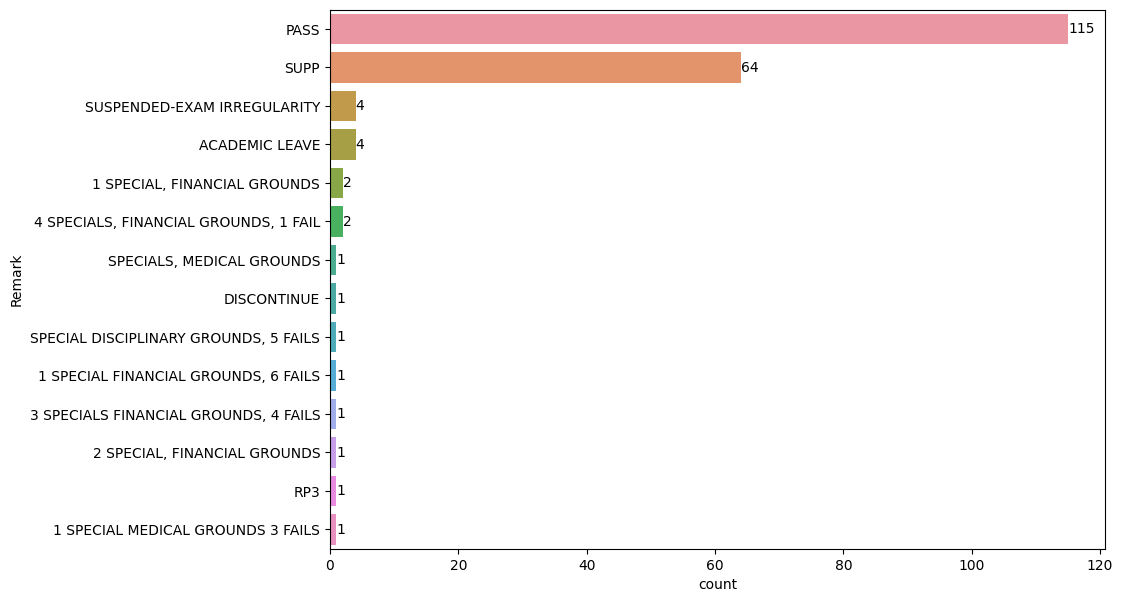

In [132]:
plt.figure(figsize=(10,7))

ax =sns.barplot(year_three.Remark.value_counts().reset_index(),x='count',y='Remark')
ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])

plt.show()

In [133]:
year_three.rename(columns={"Remark":"Year3_remark"},inplace=True)

In [134]:
combine_year_three= pd.merge(combined_year_two,year_three , on='reg_no', how='left').rename(columns={"Remark":"Year1_remark"}).drop_duplicates()
combine_year_three

,index,reg_no,Settlement Type,Gender,Department,Year_one,Year1_remark,Year1_work_study,Year1_remark,year1_supplementary,Time,Year_two,Year2_remark,Year2_work_study,Year2_supplementary,Year_three,Year3_remark,Year3_work_study,Year,Year3_supplementary
0,0,SCT-251-001/2020,GOK,Male,IC,C,PASS,0,PASS,0,NaN,D,SUPP,0.0,0.0,D,SUPP,0.0,2020,1.0
1,1,SCT-251-003/2020,GOK,Male,IC,D,SUPP,0,SUPP,1,NaN,D,SUPP,0.0,0.0,D,"1 SPECIAL FINANCIAL GROUNDS, 6 FAILS",0.0,2020,0.0
2,2,SCT-251-004/2020,GOK,Male,IC,C,SUPP,0,SUPP,1,2.0,D,ACADEMIC LEAVE,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,3,SCT-251-005/2020,GOK,Male,IC,D,PASS,0,PASS,0,2.0,C,ACADEMIC LEAVE,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,4,SCT-251-006/2020,GOK,Male,IC,C,PASS,0,PASS,0,NaN,C,PASS,0.0,0.0,C,PASS,0.0,2020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,11,SCT-253-022/2020,SSP,Male,APCS,E,"6 FAILS, RP11",0,RP1,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,12,SCT-258-045/2020,SSP,Male,INST,D,"6 FAILS,RP1",0,RP1,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,13,SCT-255-032/2020,SSP,Female,AOL,E,"7 FAILS,RP1",0,RP1,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,14,SCT-256-026/2020,SSP,Female,RET,E,"6 FAILS, RP11",0,RP1,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


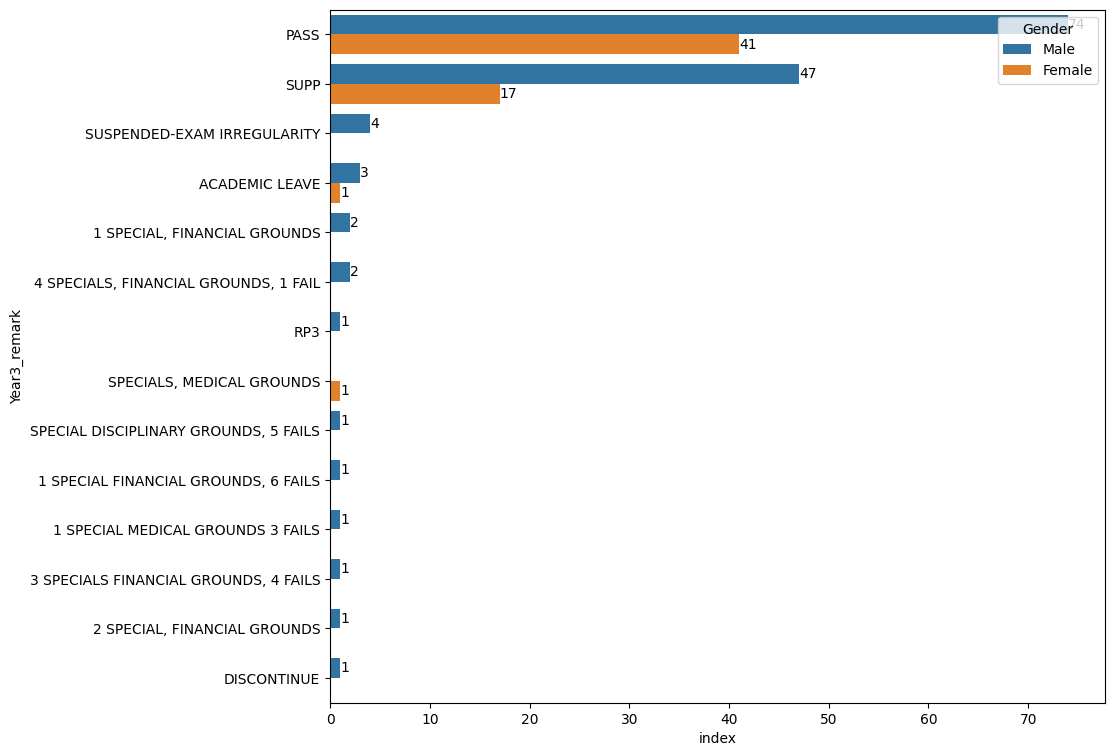

In [135]:
plt.figure(figsize=(10,9))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(combine_year_three.groupby(['Year3_remark', 'Gender']).count().sort_values(by='index',ascending=False).reset_index(),x='index',y='Year3_remark',hue='Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [136]:
combine_year_three.Year_three.value_counts()

Year_three
C    79
B    48
D    47
A    15
E     9
Name: count, dtype: int64

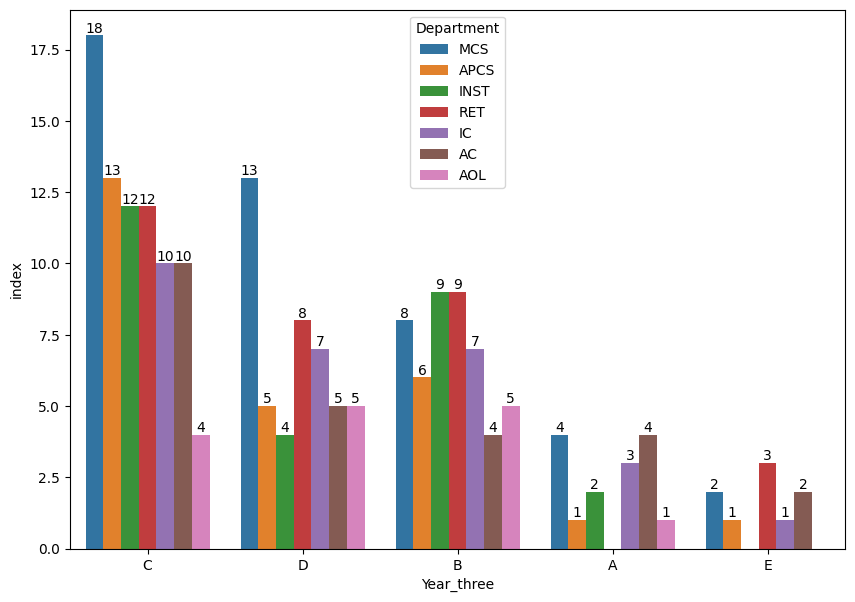

In [137]:
plt.figure(figsize=(10,7))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(combine_year_three.groupby(['Department', 'Year_three']).count().sort_values(by='index',ascending=False).reset_index(),y='index',x='Year_three',hue='Department')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.show()

In [138]:
combine_year_three.Year3_remark.value_counts().index

Index(['PASS', 'SUPP', 'SUSPENDED-EXAM IRREGULARITY', 'ACADEMIC LEAVE',
       '1 SPECIAL, FINANCIAL GROUNDS', '4 SPECIALS, FINANCIAL GROUNDS, 1 FAIL',
       '1 SPECIAL FINANCIAL GROUNDS, 6 FAILS',
       '3 SPECIALS FINANCIAL GROUNDS, 4 FAILS', 'SPECIALS, MEDICAL GROUNDS',
       'DISCONTINUE', 'SPECIAL DISCIPLINARY GROUNDS, 5 FAILS', 'RP3',
       '2 SPECIAL, FINANCIAL GROUNDS', '1 SPECIAL MEDICAL GROUNDS 3 FAILS'],
      dtype='object', name='Year3_remark')

In [139]:
third_year_dropout=['SUSPENDED-EXAM IRREGULARITY','ACADEMIC LEAVE','DISCONTINUE','RP3']

combine_year_three.loc[combine_year_three.Year3_remark.isin(third_year_dropout), "Time"] = 3

In [140]:
combine_year_three.Time.value_counts()

Time
1.0    36
2.0    17
3.0    10
Name: count, dtype: int64

In [141]:
combine_year_three.isnull().sum() # Expecting 218 students to transition to year 4 

index                    0
reg_no                   0
Settlement Type          0
Gender                   0
Department               0
Year_one                 0
Year1_remark             0
Year1_work_study         0
Year1_remark             0
year1_supplementary      0
Time                   218
Year_two                36
Year2_remark            36
Year2_work_study        36
Year2_supplementary     36
Year_three              83
Year3_remark            82
Year3_work_study        82
Year                    82
Year3_supplementary     82
dtype: int64

## Year four

In [142]:
year_four=pd.read_excel(Data_path+'complete_year_four.xlsx').rename(columns={"Registration No.":"reg_no", "GRADE":"Year_four","Remarks":"Year4_remarks"}).drop_duplicates(subset="reg_no")
year_four.reg_no =year_four.reg_no.str.strip()
year_four.Year4_remarks =year_four.Year4_remarks.str.strip()

In [143]:
year4_work_study=['SCT-252-023/2020','SCT-252-026/2020','SCT-253-040/2020','SCT-252-027/2020','SCT-251-031/2020',
                  'SCT-251-024/2020']

len(year4_work_study)

6

In [144]:
year_four['Year4_work_study'] = np.where(year_four.reg_no.isin(year4_work_study),1,0)
year_four.Year4_work_study.value_counts()

Year4_work_study
0    189
1      4
Name: count, dtype: int64

In [145]:
set(year4_work_study) - set(year_four.reg_no)

{'SCT-252-027/2020', 'SCT-253-040/2020'}

In [146]:
combine_year_three[combine_year_three.reg_no.isin(set(year4_work_study) - set(year_four.reg_no))]

,index,reg_no,Settlement Type,Gender,Department,Year_one,Year1_remark,Year1_work_study,Year1_remark,year1_supplementary,Time,Year_two,Year2_remark,Year2_work_study,Year2_supplementary,Year_three,Year3_remark,Year3_work_study,Year,Year3_supplementary
61,64,SCT-252-027/2020,GOK,Female,AC,B,SUPP,0,SUPP,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
year_four.reg_no.value_counts()

reg_no
CIT-224-082/2013    1
SCT-251-028/2020    1
SCT-258-038/2020    1
SCT-258-044/2019    1
SCT-258-044/2020    1
                   ..
SCT-256-025/2020    1
SCT-256-028/2020    1
SCT-256-029/2020    1
SCT-256-030/2020    1
SCT-252-042/2020    1
Name: count, Length: 193, dtype: int64

In [148]:
year_four[year_four.reg_no == "SCT-254-064/2020"]

,reg_no,Year_four,Year4_remarks,Year4_work_study
22,SCT-254-064/2020,B,2-SPECIALS ON COMPASSIONATE GROUNDS,0


In [149]:
year_four['Year'] = year_four.reg_no.str.split('-').str.get(2).str.split('/').str.get(1)
year_four.Year.value_counts()

Year
2020    168
2019     19
2018      4
2013      1
2017      1
Name: count, dtype: int64

In [150]:
year_four =  year_four[~(year_four.Year != '2020')]
year_four.Year.value_counts()

Year
2020    168
Name: count, dtype: int64

In [151]:
year_four.shape , combine_year_three[combine_year_three.Time.isna()].shape

((168, 5), (218, 20))

In [152]:
len(set(year_four.reg_no)) , len(set(combine_year_three[combine_year_three.Time.isna()].reg_no))

(168, 218)

In [153]:
combine_year_three[combine_year_three.Time.isna()].shape

(218, 20)

In [154]:
#We opt to drop them 
year_four = year_four[~year_four.reg_no.isin(set(year_four.reg_no) - set(combine_year_three.reg_no))]

In [155]:
lost_for_study_y3= set(combine_year_three[combine_year_three.Time.isna()].reg_no) - set(year_four.reg_no)

In [156]:
combine_year_three[combine_year_three.reg_no.isin(lost_for_study_y3)]

,index,reg_no,Settlement Type,Gender,Department,Year_one,Year1_remark,Year1_work_study,Year1_remark,year1_supplementary,Time,Year_two,Year2_remark,Year2_work_study,Year2_supplementary,Year_three,Year3_remark,Year3_work_study,Year,Year3_supplementary
0,0,SCT-251-001/2020,GOK,Male,IC,C,PASS,0,PASS,0,NaN,D,SUPP,0.0,0.0,D,SUPP,0.0,2020,1.0
1,1,SCT-251-003/2020,GOK,Male,IC,D,SUPP,0,SUPP,1,NaN,D,SUPP,0.0,0.0,D,"1 SPECIAL FINANCIAL GROUNDS, 6 FAILS",0.0,2020,0.0
11,11,SCT-251-013/2020,GOK,Male,IC,C,PASS,0,PASS,0,NaN,D,SUPP,0.0,0.0,NaN,NaN,NaN,NaN,NaN
13,13,SCT-251-015/2020,GOK,Male,IC,D,SUPP,0,SUPP,1,NaN,D,SUPP,0.0,0.0,D,"3 SPECIALS FINANCIAL GROUNDS, 4 FAILS",0.0,2020,0.0
23,23,SCT-251-025/2020,GOK,Male,IC,C,SUPP,0,SUPP,1,NaN,B,PASS,0.0,0.0,NaN,NaN,NaN,NaN,NaN
33,33,SCT-251-038/2020,GOK,Male,IC,D,SUPP,0,SUPP,1,NaN,D,SUPP,0.0,0.0,D,SUPP,0.0,2020,1.0
34,34,SCT-251-040/2020,GOK,Male,IC,D,SUPP,0,SUPP,1,NaN,E,SUPP,0.0,0.0,NaN,NaN,NaN,NaN,NaN
36,36,SCT-251-042/2020,GOK,Male,IC,C,SUPP,0,SUPP,1,NaN,C,PASS,0.0,0.0,NaN,NaN,NaN,NaN,NaN
44,47,SCT-252-006/2020,GOK,Male,AC,D,SUPP,0,SUPP,1,NaN,E,SUPP,0.0,0.0,E,SUPP,0.0,2020,1.0
46,49,SCT-252-008/2020,GOK,Female,AC,D,PASS,0,PASS,0,NaN,D,SUPP,0.0,0.0,D,SUPP,0.0,2020,1.0


In [157]:
lost_for_study_y3 # These student get lost in third year since we don't have 4th year result for them 

#We chose to classify them as 3rd year dropouts 
combine_year_three.loc[combine_year_three.reg_no.isin(lost_for_study_y3), "Time"] =  3

In [158]:
combine_year_three.isnull().sum()

index                    0
reg_no                   0
Settlement Type          0
Gender                   0
Department               0
Year_one                 0
Year1_remark             0
Year1_work_study         0
Year1_remark             0
year1_supplementary      0
Time                   164
Year_two                36
Year2_remark            36
Year2_work_study        36
Year2_supplementary     36
Year_three              83
Year3_remark            82
Year3_work_study        82
Year                    82
Year3_supplementary     82
dtype: int64

In [159]:
list(set(year_four.reg_no) - set(combine_year_three.reg_no)) # These students appear in fourth year with no trail of results from year 1,2 or 3 !!

[]

In [160]:
combine_year_three[combine_year_three.reg_no.isin(set(year_four.reg_no) - set(combine_year_three.reg_no))]

,index,reg_no,Settlement Type,Gender,Department,Year_one,Year1_remark,Year1_work_study,Year1_remark,year1_supplementary,Time,Year_two,Year2_remark,Year2_work_study,Year2_supplementary,Year_three,Year3_remark,Year3_work_study,Year,Year3_supplementary


In [161]:
year_four[year_four.reg_no.isin(list(set(year_four.reg_no) - set(combine_year_three.reg_no)))] # all have the same grade in year 4

,reg_no,Year_four,Year4_remarks,Year4_work_study,Year


In [162]:
#We opt to drop them 
year_four = year_four[~year_four.reg_no.isin(set(year_four.reg_no) - set(combine_year_three.reg_no))]

In [163]:
year_four.shape, combine_year_three[combine_year_three.Time.isna()].shape

((165, 5), (164, 20))

In [164]:
year_four.Year4_remarks.value_counts().index

Index(['PASS', 'SUPP', 'WITHHOLD (DISCIPLINARY)', 'SUSPENSION EXAM IRREG',
       'WITHHOLD(DISCIPLINARY)', '2-SPECIALS ON COMPASSIONATE GROUNDS',
       '7 SPECIAL,MEDICAL'],
      dtype='object', name='Year4_remarks')

In [165]:
year_four.Year4_remarks = year_four.Year4_remarks.str.replace("WITHHOLD (DISCIPLINARY)","WITHHOLD(DISCIPLINARY)")

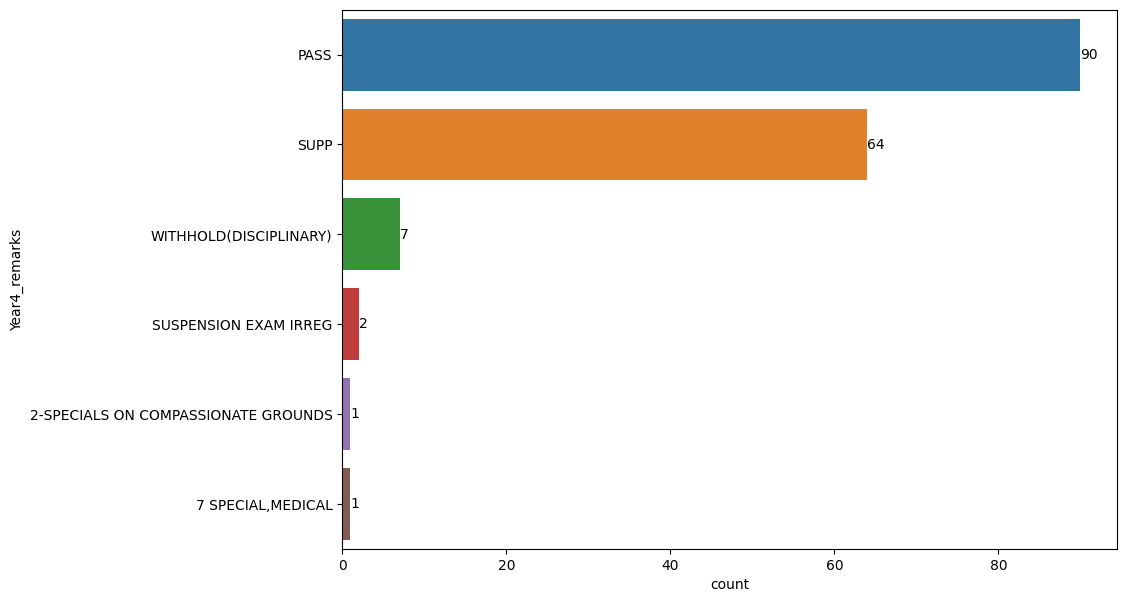

In [166]:
plt.figure(figsize=(10,7))

ax =sns.barplot(year_four.Year4_remarks.value_counts().reset_index(),x='count',y='Year4_remarks')
ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])

plt.show()

In [167]:
year_four.Year4_remarks.value_counts().index

Index(['PASS', 'SUPP', 'WITHHOLD(DISCIPLINARY)', 'SUSPENSION EXAM IRREG',
       '2-SPECIALS ON COMPASSIONATE GROUNDS', '7 SPECIAL,MEDICAL'],
      dtype='object', name='Year4_remarks')

In [168]:
year_four['Year4_supplementary'] = np.where(year_four['Year4_remarks'] == 'SUPP',1,0)
year_four.Year4_supplementary.value_counts()

Year4_supplementary
0    101
1     64
Name: count, dtype: int64

In [169]:
final_data=pd.merge(combine_year_three,year_four,on='reg_no',how='left').drop(columns=['Year_x','Year_y','index'],axis=1)
final_data

final_data = final_data.loc[:, ~final_data.columns.duplicated()]
final_data

,reg_no,Settlement Type,Gender,Department,Year_one,Year1_remark,Year1_work_study,year1_supplementary,Time,Year_two,...,Year2_work_study,Year2_supplementary,Year_three,Year3_remark,Year3_work_study,Year3_supplementary,Year_four,Year4_remarks,Year4_work_study,Year4_supplementary
0,SCT-251-001/2020,GOK,Male,IC,C,PASS,0,0,3.0,D,...,0.0,0.0,D,SUPP,0.0,1.0,NaN,NaN,NaN,NaN
1,SCT-251-003/2020,GOK,Male,IC,D,SUPP,0,1,3.0,D,...,0.0,0.0,D,"1 SPECIAL FINANCIAL GROUNDS, 6 FAILS",0.0,0.0,NaN,NaN,NaN,NaN
2,SCT-251-004/2020,GOK,Male,IC,C,SUPP,0,1,2.0,D,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SCT-251-005/2020,GOK,Male,IC,D,PASS,0,0,2.0,C,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SCT-251-006/2020,GOK,Male,IC,C,PASS,0,0,NaN,C,...,0.0,0.0,C,PASS,0.0,0.0,D,PASS,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,SCT-253-022/2020,SSP,Male,APCS,E,"6 FAILS, RP11",0,0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,SCT-258-045/2020,SSP,Male,INST,D,"6 FAILS,RP1",0,0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,SCT-255-032/2020,SSP,Female,AOL,E,"7 FAILS,RP1",0,0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,SCT-256-026/2020,SSP,Female,RET,E,"6 FAILS, RP11",0,0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
fourth_year_dropouts= ['WITHHOLD(DISCIPLINARY)','SUSPENSION EXAM IRREG']

final_data.loc[final_data.Year4_remarks.isin(fourth_year_dropouts), "Time" ] = 4

In [171]:
final_data.isnull().sum()

reg_no                   0
Settlement Type          0
Gender                   0
Department               0
Year_one                 0
Year1_remark             0
Year1_work_study         0
year1_supplementary      0
Time                   155
Year_two                36
Year2_remark            36
Year2_work_study        36
Year2_supplementary     36
Year_three              83
Year3_remark            82
Year3_work_study        82
Year3_supplementary     82
Year_four              116
Year4_remarks          116
Year4_work_study       116
Year4_supplementary    116
dtype: int64

In [172]:
final_data.Time.value_counts()

Time
3.0    64
1.0    36
2.0    17
4.0     9
Name: count, dtype: int64

In [173]:
final_data.groupby(['Year4_remarks', 'Gender']).count()

reg_no  Settlement Type  \
Year4_remarks                       Gender                            
2-SPECIALS ON COMPASSIONATE GROUNDS Female       1                1   
7 SPECIAL,MEDICAL                   Female       1                1   
PASS                                Female      37               37   
                                    Male        53               53   
SUPP                                Female      16               16   
                                    Male        48               48   
SUSPENSION EXAM IRREG               Female       1                1   
                                    Male         1                1   
WITHHOLD(DISCIPLINARY)              Male         7                7   

                                            Department  Year_one  \
Year4_remarks                       Gender                         
2-SPECIALS ON COMPASSIONATE GROUNDS Female           1         1   
7 SPECIAL,MEDICAL                   Female           1         1   
PASS                                Female          37        37   
                                    Male            53        53   
SUPP                                Female          16        16   
                                    Male            48        48   
SUSPENSION EXAM IRREG               Female           1         1   
                                    Male             1         1   
WITHHOLD(DISCIPLINARY)              Male             7         7   

                                            Year1_remark  Year1_work_study  \
Year4_remarks                       Gender                                   
2-SPECIALS ON COMPASSIONATE GROUNDS Female             1                 1   
7 SPECIAL,MEDICAL                   Female             1                 1   
PASS                                Female            37                37   
                                    Male              53                53   
SUPP                                Female            16                16   
                                    Male              48                48   
SUSPENSION EXAM IRREG               Female             1                 1   
                                    Male               1                 1   
WITHHOLD(DISCIPLINARY)              Male               7                 7   

                                            year1_supplementary  Time  \
Year4_remarks                       Gender                              
2-SPECIALS ON COMPASSIONATE GROUNDS Female                    1     0   
7 SPECIAL,MEDICAL                   Female                    1     0   
PASS                                Female                   37     0   
                                    Male                     53     0   
SUPP                                Female                   16     0   
                                    Male                     48     1   
SUSPENSION EXAM IRREG               Female                    1     1   
                                    Male                      1     1   
WITHHOLD(DISCIPLINARY)              Male                      7     7   

                                            Year_two  Year2_remark  \
Year4_remarks                       Gender                           
2-SPECIALS ON COMPASSIONATE GROUNDS Female         1             1   
7 SPECIAL,MEDICAL                   Female         1             1   
PASS                                Female        37            37   
                                    Male          53            53   
SUPP                                Female        16            16   
                                    Male          48            48   
SUSPENSION EXAM IRREG               Female         1             1   
                                    Male           1             1   
WITHHOLD(DISCIPLINARY)              Male           7             7   

                                            Year2_work_study  \
Year4_remarks  

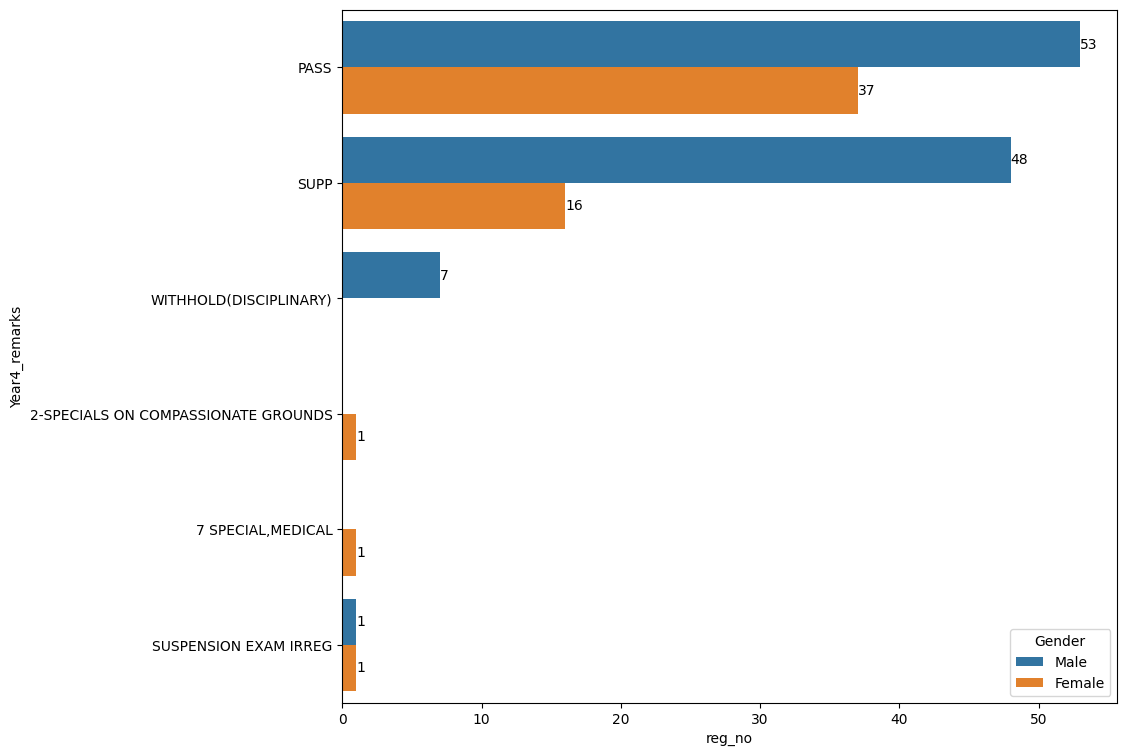

In [174]:
plt.figure(figsize=(10,9))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(final_data.groupby(['Year4_remarks', 'Gender']).count().sort_values(by='reg_no',ascending=False).reset_index(),x='reg_no',y='Year4_remarks',hue='Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

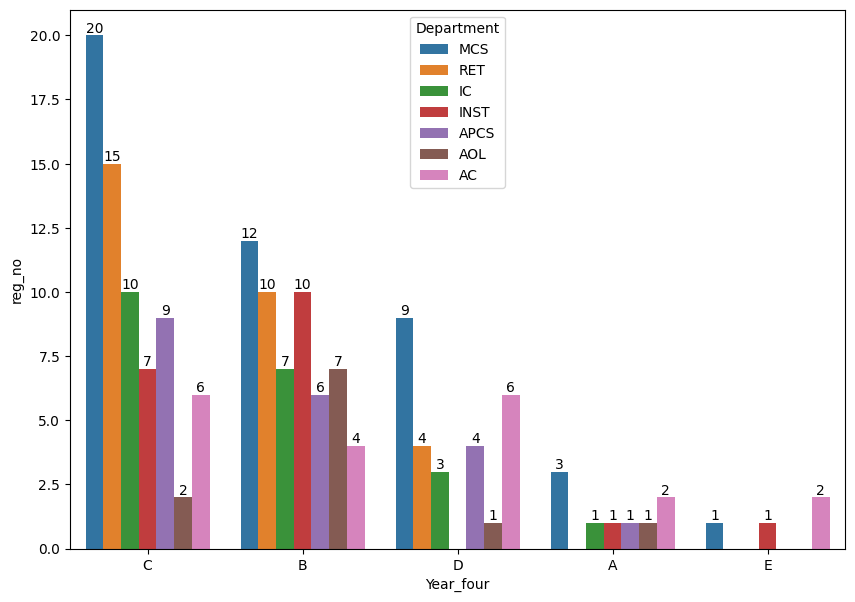

In [175]:
plt.figure(figsize=(10,7))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(final_data.groupby(['Department', 'Year_four']).count().sort_values(by='reg_no',ascending=False).reset_index(),y='reg_no',x='Year_four',hue='Department')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.show()

In [176]:

final_data['Event'] = np.where(final_data.Time.isin([1,2,3,4]),1,0) #Event of interest labelling 

In [177]:
final_data.Event.value_counts()

Event
0    155
1    126
Name: count, dtype: int64

In [178]:
final_data

,reg_no,Settlement Type,Gender,Department,Year_one,Year1_remark,Year1_work_study,year1_supplementary,Time,Year_two,...,Year2_supplementary,Year_three,Year3_remark,Year3_work_study,Year3_supplementary,Year_four,Year4_remarks,Year4_work_study,Year4_supplementary,Event
0,SCT-251-001/2020,GOK,Male,IC,C,PASS,0,0,3.0,D,...,0.0,D,SUPP,0.0,1.0,NaN,NaN,NaN,NaN,1
1,SCT-251-003/2020,GOK,Male,IC,D,SUPP,0,1,3.0,D,...,0.0,D,"1 SPECIAL FINANCIAL GROUNDS, 6 FAILS",0.0,0.0,NaN,NaN,NaN,NaN,1
2,SCT-251-004/2020,GOK,Male,IC,C,SUPP,0,1,2.0,D,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,SCT-251-005/2020,GOK,Male,IC,D,PASS,0,0,2.0,C,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,SCT-251-006/2020,GOK,Male,IC,C,PASS,0,0,NaN,C,...,0.0,C,PASS,0.0,0.0,D,PASS,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,SCT-253-022/2020,SSP,Male,APCS,E,"6 FAILS, RP11",0,0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
277,SCT-258-045/2020,SSP,Male,INST,D,"6 FAILS,RP1",0,0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
278,SCT-255-032/2020,SSP,Female,AOL,E,"7 FAILS,RP1",0,0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
279,SCT-256-026/2020,SSP,Female,RET,E,"6 FAILS, RP11",0,0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [179]:
final_data.columns

Index(['reg_no', 'Settlement Type', 'Gender', 'Department', 'Year_one',
       'Year1_remark', 'Year1_work_study', 'year1_supplementary', 'Time',
       'Year_two', 'Year2_remark', 'Year2_work_study', 'Year2_supplementary',
       'Year_three', 'Year3_remark', 'Year3_work_study', 'Year3_supplementary',
       'Year_four', 'Year4_remarks', 'Year4_work_study', 'Year4_supplementary',
       'Event'],
      dtype='object')

In [180]:
final_data.to_csv('Modelling_data.csv',index=False)

## Time Dependent Cox Proportional Hazards Model 

In [226]:
final_data=pd.read_csv('/kaggle/working/Modelling_data.csv')
final_data.shape

(281, 22)

#### Data Transformation

In [227]:
import pandas as pd

def reshape_for_time_dependent_cox(data):
    data= data.copy()
    # Grade columns in order
    grade_cols = ['Year_one', 'Year_two', 'Year_three', 'Year_four']

    supplementary = ['year1_supplementary',  'Year2_supplementary', 'Year3_supplementary','Year4_supplementary']

    work_study = ['Year1_work_study',  'Year2_work_study', 'Year3_work_study','Year4_work_study']

    remark = ['Year1_remark','Year2_remark', 'Year3_remark', 'Year4_remarks']

    # Store new rows
    new_rows = []

    for idx, row in data.iterrows():
        dropout_year = row['Time'] # When dropout happened
        event = int(row['Event'])  # 1 = dropout, 0 = completed

        for year in range(1, 5):
            if year > dropout_year:
                break  # Student never reached this year

            start_time = year - 1
            stop_time = year

            # Event occurs if this year == dropout year and Event=1
            event_at_stop = 1 if (year == dropout_year and event == 1) else 0

            new_rows.append({
                'reg_no': row['reg_no'],
                'Gender': row['Gender'],
                'Department': row['Department'],
                'Settlement Type': row['Settlement Type'],
                'start_time': start_time,
                'stop_time': stop_time,
                'Year': year,
                'Grade': row[grade_cols[year-1]],
                'supplementary' : row[supplementary[year-1]],
                'work_study' : row[work_study[year-1]],
                # 'remark' : row[remark[year-1]],
                'Event': event_at_stop
            })

    long_df = pd.DataFrame(new_rows)
    long_df = long_df.sort_values(by=['reg_no', 'start_time']).reset_index(drop=True)
    return long_df
long_format=reshape_for_time_dependent_cox(final_data)

In [228]:
long_format.drop('reg_no',axis=1)

,Gender,Department,Settlement Type,start_time,stop_time,Year,Grade,supplementary,work_study,Event
0,Male,IC,GOK,0,1,1,C,0.0,0.0,0
1,Male,IC,GOK,1,2,2,D,0.0,0.0,0
2,Male,IC,GOK,2,3,3,D,1.0,0.0,1
3,Male,IC,GOK,0,1,1,D,1.0,0.0,0
4,Male,IC,GOK,1,2,2,D,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
913,Male,INST,GOK,0,1,1,C,0.0,0.0,0
914,Male,INST,GOK,1,2,2,B,0.0,0.0,0
915,Male,INST,GOK,2,3,3,C,0.0,0.0,0
916,Male,INST,GOK,3,4,4,C,0.0,0.0,1


In [229]:
long_format.remark = long_format.remark.str.strip()

plt.figure(figsize=(10,7))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(long_format.groupby(['Department', 'remark']).count().sort_values(by='reg_no',ascending=False).head(15).reset_index(),y='reg_no',x='remark',hue='Department')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])

plt.title('Remark distribution by department')
plt.savefig('Remark_distribution')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'remark'

In [230]:
pd.set_option("display.max_columns",None)

unique_count = long_format.reg_no.value_counts().reset_index()
one = unique_count[unique_count['count'] == 1]
final_data[final_data.reg_no.isin(set(one.reg_no))].drop('reg_no',axis=1) #this makes sense 

,Settlement Type,Gender,Department,Year_one,Year1_remark,Year1_work_study,year1_supplementary,Time,Year_two,Year2_remark,Year2_work_study,Year2_supplementary,Year_three,Year3_remark,Year3_work_study,Year3_supplementary,Year_four,Year4_remarks,Year4_work_study,Year4_supplementary,Event
10,GOK,Male,IC,C,SUPP,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
20,GOK,Male,IC,C,PASS,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
29,GOK,Male,IC,B,PASS,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
38,GOK,Male,IC,E,"7 FAILS,RP1/",0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
47,GOK,Male,AC,D,SUPP,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
57,GOK,Male,AC,E,FINANCIAL GROUNDS ACADEMIC LEAVE ON,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
61,GOK,Female,AC,B,SUPP,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
77,GOK,Male,APCS,E,"DEREGISTER, ABSCONDED",0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
84,GOK,Male,APCS,C,SUPP,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
86,GOK,Male,APCS,D,SUPP,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [231]:
# long_format[long_format.reg_no == 'SCT-256-027/2020']

In [232]:
# long_format

In [233]:
long_format.Department.value_counts().index

Index(['MCS', 'RET', 'IC', 'AC', 'APCS', 'INST', 'AOL'], dtype='object', name='Department')

### Encoding Categorical Varibales 

In [234]:
gender= {"Male":1, "Female":0}

dept= {'MCS':1, 'RET':2, 'IC':3, 'APCS':4, 'AC':5, 'INST':6, 'AOL':7}

settlement={"GOK":1, "SSP":0}

grades={"A":1,"B":2,"C":3,"D":4,"E":5}

long_format['Gender'] = long_format['Gender'].map(gender)
long_format['Department'] = long_format['Department'].map(dept)
long_format['Settlement Type'] = long_format['Settlement Type'].map(settlement)
long_format['Grade'] = long_format['Grade'].map(grades)


In [235]:
long_format[long_format.Grade.isnull()].drop('reg_no',axis=1)

,Gender,Department,Settlement Type,start_time,stop_time,Year,Grade,supplementary,work_study,Event
37,1,3,1,2,3,3,NaN,NaN,NaN,1
78,1,3,1,2,3,3,NaN,NaN,NaN,1
116,1,3,1,2,3,3,NaN,NaN,NaN,1
123,1,3,1,2,3,3,NaN,NaN,NaN,1
188,1,5,1,2,3,3,NaN,0.0,0.0,0
216,1,5,1,2,3,3,NaN,NaN,NaN,1
231,0,5,1,2,3,3,NaN,NaN,NaN,1
238,0,5,1,2,3,3,NaN,NaN,NaN,1
241,0,5,1,2,3,3,NaN,NaN,NaN,1
275,1,4,1,2,3,3,NaN,NaN,NaN,1


In [236]:
long_format.dropna(inplace=True)

In [239]:
long_format = long_format.drop(columns=['Year','remark'],axis=1,errors='ignore').rename(columns={"Settlement Type":"settlement"})

In [240]:
long_format.to_csv('Final_time_dependent_data.csv',index=False)

In [242]:
long_format.drop('reg_no',axis=1)

,Gender,Department,settlement,start_time,stop_time,Grade,supplementary,work_study,Event
0,1,3,1,0,1,3.0,0.0,0.0,0
1,1,3,1,1,2,4.0,0.0,0.0,0
2,1,3,1,2,3,4.0,1.0,0.0,1
3,1,3,1,0,1,4.0,1.0,0.0,0
4,1,3,1,1,2,4.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
913,1,6,1,0,1,3.0,0.0,0.0,0
914,1,6,1,1,2,2.0,0.0,0.0,0
915,1,6,1,2,3,3.0,0.0,0.0,0
916,1,6,1,3,4,3.0,0.0,0.0,1


In [243]:
# Check for columns with only one unique value
constant_cols = [col for col in long_format.columns if long_format[col].nunique() == 1]

print("Constant columns:", constant_cols)


Constant columns: []


In [244]:
# Check correlation matrix
corr_cols=[col for col in long_format.columns if col not in ['reg_no','']]
correlation_matrix = long_format[corr_cols].corr()

# Find pairs with high correlation (>0.9)
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
                   if (col1 != col2) and (abs(correlation_matrix.loc[col1, col2]) > 0.9)]

print("Highly correlated pairs:", high_corr_pairs)


Highly correlated pairs: [('start_time', 'stop_time'), ('stop_time', 'start_time')]


### CoxTimeVarying Fitter Model 

In [217]:
!pip install lifelines -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 5.7 MB/s eta 0:00:00


In [245]:
import pandas as pd
from lifelines import CoxTimeVaryingFitter

# Assuming you have the "long_final_data" created earlier

# Initialize the model
ctv1 = CoxTimeVaryingFitter()

# Fit the model
ctv1.fit(long_format, 
        id_col="reg_no", 
        start_col="start_time", 
        stop_col="stop_time", 
        event_col="Event",show_progress=True)

# Show the summary
ctv1.print_summary()


Iteration 1: norm_delta = 1.69e+00, step_size = 0.9500, log_lik = -571.81535, newton_decrement = 1.18e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 8.10e-01, step_size = 0.9500, log_lik = -542.04431, newton_decrement = 6.48e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 3.95e-01, step_size = 0.9500, log_lik = -486.47574, newton_decrement = 7.00e+00, seconds_since_start = 0.0
Iteration 4: norm_delta = 2.41e-02, step_size = 1.0000, log_lik = -479.48404, newton_decrement = 3.48e-02, seconds_since_start = 0.0
Iteration 5: norm_delta = 2.70e-04, step_size = 1.0000, log_lik = -479.44900, newton_decrement = 5.95e-06, seconds_since_start = 0.0
Iteration 6: norm_delta = 5.89e-08, step_size = 1.0000, log_lik = -479.44899, newton_decrement = 3.54e-13, seconds_since_start = 0.0
Convergence completed after 6 iterations.


<lifelines.CoxTimeVaryingFitter: fitted with 888 periods, 281 subjects, 107 events>
         event col = 'Event'
number of subjects = 281
 number of periods = 888
  number of events = 107
partial log-likelihood = -479.45
  time fit was run = 2025-05-09 14:01:26 UTC

---
               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                      
Gender         0.68      1.97      0.27            0.15            1.20                1.16                3.34
Department     0.12      1.13      0.05            0.02            0.22                1.02                1.25
settlement    -1.76      0.17      0.35           -2.45           -1.07                0.09                0.34
Grade          1.33      3.79      0.12            1.10            1.56                3.00                4.77
supplementary -0.50      0.60      0.22           -0.93           -0.08                0.40                0.92
work_study     0.79      2.21      1.03           -1.22            2.81                0.29               16.58

               cmp to     z      p  -log2(p)
covariate                                   
Gender           0.00  2.50   0.01      6.35
Department       0.00  2.30   0.02      5.55
settlement       0.00 -5.01 <0.005     20.78
Grade            0.00 11.28 <0.005     95.62
supplementary    0.00 -2.33   0.02      5.67
work_study       0.00  0.77   0.44      1.18
---
Partial AIC = 970.90
log-likelihood ratio test = 184.73 on 6 df
-log2(p) of ll-ratio test = 121.17

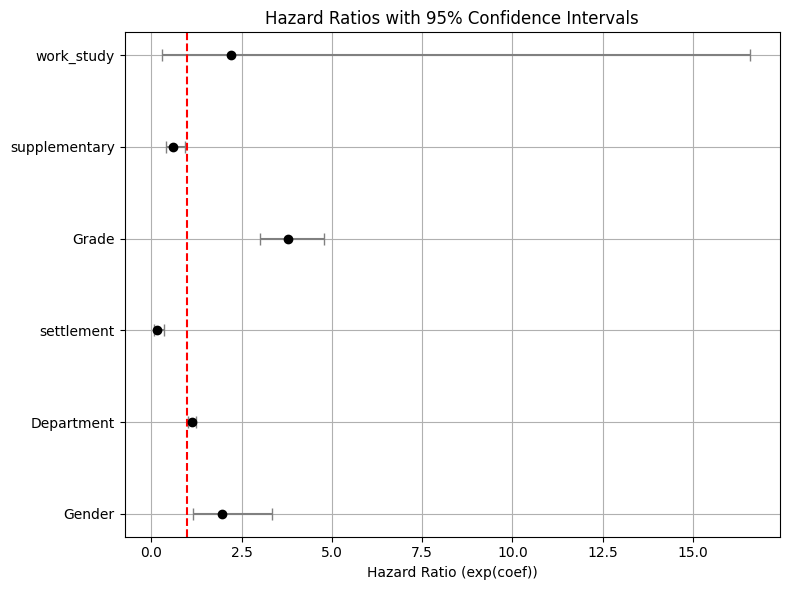

In [246]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assume your fitted model is called `cph`
summary_df = ctv1.summary.copy()

# Prepare the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Extract values
variables = summary_df.index
hr = summary_df['exp(coef)']
lower_ci = summary_df['exp(coef) lower 95%']
upper_ci = summary_df['exp(coef) upper 95%']

# Plot the hazard ratios
ax.errorbar(hr, variables, xerr=[hr - lower_ci, upper_ci - hr], fmt='o', color='black', ecolor='gray', capsize=4)

# Reference line at HR=1 (no effect)
ax.axvline(x=1, color='red', linestyle='--')

# Labels and title
ax.set_xlabel('Hazard Ratio (exp(coef))')
ax.set_title('Hazard Ratios with 95% Confidence Intervals')
ax.grid(True)

plt.tight_layout()
plt.show()


### An Interaction Time dependent Cox PH Model

In [247]:
interaction_data=long_format.copy()
interaction_data["Grade_supplementary"] = interaction_data["Grade"] * interaction_data["supplementary"]

# Initialize the model
ctv2 = CoxTimeVaryingFitter()


ctv2.fit(
    interaction_data,
    id_col="reg_no",
    start_col="start_time",
    stop_col="stop_time",
    event_col="Event", show_progress=True,
    formula="Gender + Department + settlement + Grade + supplementary + Grade_supplementary"
)
# Show the summary
ctv2.print_summary()


Iteration 1: norm_delta = 2.93e+00, step_size = 0.9500, log_lik = -571.81535, newton_decrement = 1.24e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.35e+00, step_size = 0.9500, log_lik = -545.86883, newton_decrement = 8.65e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.35e+00, step_size = 0.9500, log_lik = -495.66174, newton_decrement = 2.42e+01, seconds_since_start = 0.0
Iteration 4: norm_delta = 1.93e-01, step_size = 0.9310, log_lik = -474.28211, newton_decrement = 6.47e-01, seconds_since_start = 0.0
Iteration 5: norm_delta = 7.40e-03, step_size = 0.9124, log_lik = -473.64599, newton_decrement = 2.17e-03, seconds_since_start = 0.0
Iteration 6: norm_delta = 7.55e-04, step_size = 1.0000, log_lik = -473.64383, newton_decrement = 1.69e-05, seconds_since_start = 0.0
Iteration 7: norm_delta = 5.02e-07, step_size = 1.0000, log_lik = -473.64382, newton_decrement = 2.72e-13, seconds_since_start = 0.0
Convergence completed after 7 iterations.


<lifelines.CoxTimeVaryingFitter: fitted with 888 periods, 281 subjects, 107 events>
         event col = 'Event'
number of subjects = 281
 number of periods = 888
  number of events = 107
partial log-likelihood = -473.64
  time fit was run = 2025-05-09 14:03:14 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
Gender               0.70      2.01      0.27            0.17            1.23                1.18                3.42
Department           0.12      1.13      0.05            0.02            0.22                1.02                1.24
settlement          -1.72      0.18      0.35           -2.41           -1.04                0.09                0.35
Grade                1.53      4.62      0.14            1.26            1.80                3.53                6.03
supplementary        3.52     33.89      1.15            1.26            5.78                3.54              324.43
Grade_supplementary -1.04      0.35      0.30           -1.63           -0.45                0.20                0.64

                     cmp to     z      p  -log2(p)
covariate                                         
Gender                 0.00  2.58   0.01      6.68
Department             0.00  2.30   0.02      5.55
settlement             0.00 -4.91 <0.005     20.08
Grade                  0.00 11.20 <0.005     94.30
supplementary          0.00  3.06 <0.005      8.80
Grade_supplementary    0.00 -3.46 <0.005     10.88
---
Partial AIC = 959.29
log-likelihood ratio test = 196.34 on 6 df
-log2(p) of ll-ratio test = 129.37

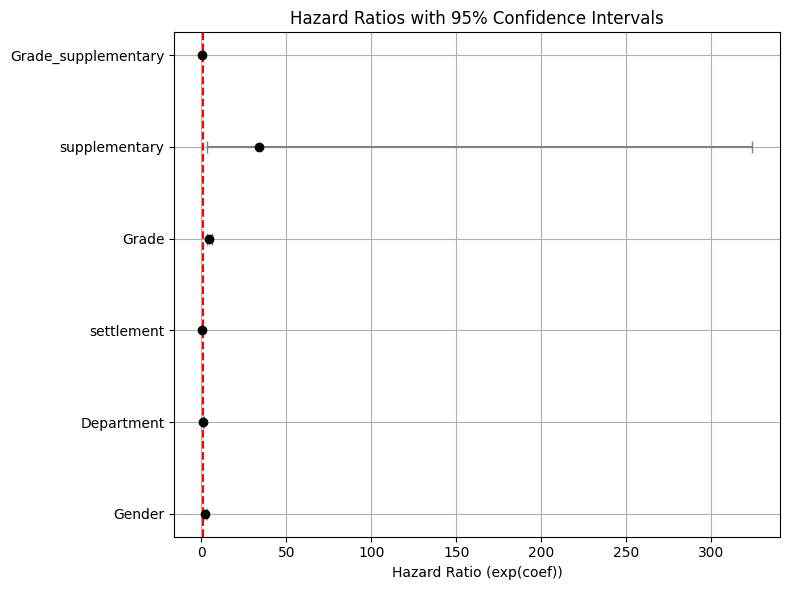

In [248]:
# Assume your fitted model is called `cph`
summary_df = ctv2.summary.copy()

# Prepare the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Extract values
variables = summary_df.index
hr = summary_df['exp(coef)']
lower_ci = summary_df['exp(coef) lower 95%']
upper_ci = summary_df['exp(coef) upper 95%']

# Plot the hazard ratios
ax.errorbar(hr, variables, xerr=[hr - lower_ci, upper_ci - hr], fmt='o', color='black', ecolor='gray', capsize=4)

# Reference line at HR=1 (no effect)
ax.axvline(x=1, color='red', linestyle='--')

# Labels and title
ax.set_xlabel('Hazard Ratio (exp(coef))')
ax.set_title('Hazard Ratios with 95% Confidence Intervals')
ax.grid(True)

plt.tight_layout()
plt.savefig("Interaction model")
plt.show()


## Baseline Time Independent Cox PH Model

In [252]:
baseline_data = long_format.sort_values(["reg_no", "start_time"]).groupby("reg_no").last().reset_index()

In [253]:
baseline_data = baseline_data.dropna(subset=corr_cols)

# Step 2: Remove constant columns
for col in corr_cols:
    if baseline_data[col].nunique() == 1:
        corr_cols.remove(col)


In [254]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(baseline_data[corr_cols], duration_col="stop_time", event_col="Event")


<lifelines.CoxPHFitter: fitted with 281 total observations, 174 right-censored observations>

In [255]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 281 total observations, 174 right-censored observations>
             duration col = 'stop_time'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 281
number of events observed = 107
   partial log-likelihood = -324.39
         time fit was run = 2025-05-09 14:04:06 UTC

---
                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                       
Gender          0.20      1.22      0.28           -0.34            0.74                0.71                2.10
Department      0.01      1.01      0.05           -0.09            0.11                0.92                1.12
settlement      0.04      1.04      0.36           -0.67            0.74                0.51                2.09
start_time    -22.90      0.00   3362.99        -6614.24         6568.44                0.00                 inf
Grade           0.16      1.18      0.12           -0.08            0.41                0.92                1.50
supplementary  -0.27      0.76      0.22           -0.70            0.16                0.50                1.17
work_study      0.00      1.00      1.03           -2.01            2.02                0.13                7.50

               cmp to     z    p  -log2(p)
covariate                                 
Gender           0.00  0.73 0.46      1.11
Department       0.00  0.26 0.79      0.34
settlement       0.00  0.10 0.92      0.12
start_time       0.00 -0.01 0.99      0.01
Grade            0.00  1.31 0.19      2.41
supplementary    0.00 -1.25 0.21      2.23
work_study       0.00  0.00 1.00      0.01
---
Concordance = 0.99
Partial AIC = 662.78
log-likelihood ratio test = 500.33 on 7 df
-log2(p) of ll-ratio test = 342.71

In [256]:
cph.check_assumptions(baseline_data[corr_cols], p_value_threshold=0.005) #all assumption of the cox model are satisified 

Proportional hazard assumption looks okay.


[]

In [257]:
residuals = cph.compute_residuals(baseline_data[corr_cols], kind="scaled_schoenfeld")
residuals

covariate,Gender,Department,settlement,start_time,Grade,supplementary,work_study
10,0.646117,-0.369081,4.018460,-2.111831,-1.756117,3.415315,-2.374483
20,0.304797,-0.350973,4.527923,-3.245272,-2.224870,-1.730645,-1.253467
29,0.490762,-0.329767,4.416044,-4.821530,-3.890699,-2.199398,-3.016015
34,-3.884022,-0.339231,-5.835622,-0.372116,-0.016202,4.052211,-0.322911
39,-0.067134,-0.393387,4.751682,-0.092757,1.106787,-0.793139,2.271628
...,...,...,...,...,...,...,...
202,2.693054,1.039845,-1.421183,2.231366,1.624798,-1.328421,-2.390422
212,1.992227,-0.291057,-0.390989,-0.023851,0.065004,-1.706638,-1.271517
224,1.992227,-0.291057,-0.390989,-0.023851,0.065004,-1.706638,-1.271517
252,2.701661,0.790630,-1.304647,0.519317,-0.019824,-1.779067,-3.576679



   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

Proportional hazard assumption looks okay.


<Figure size 2000x2000 with 0 Axes>

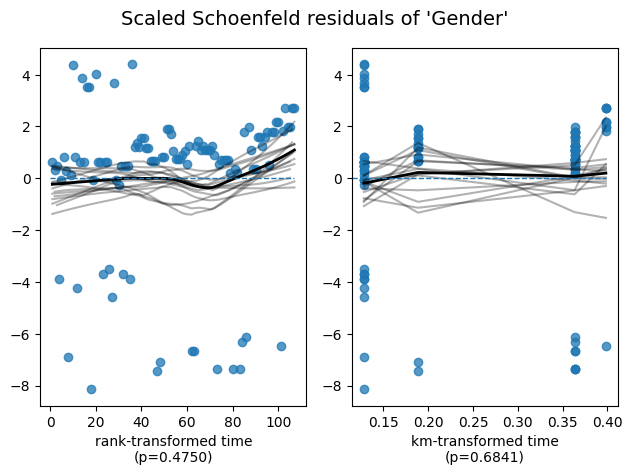

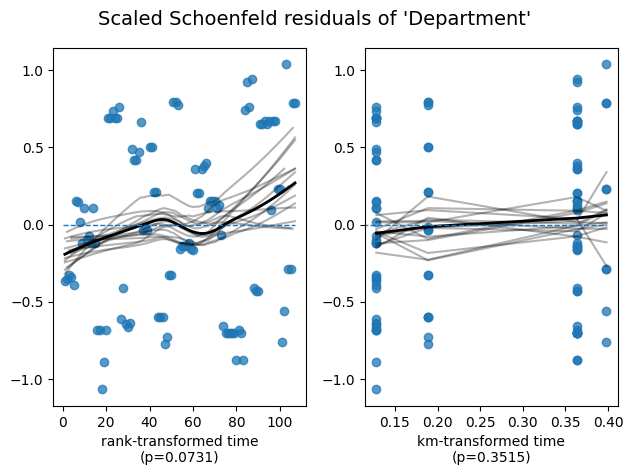

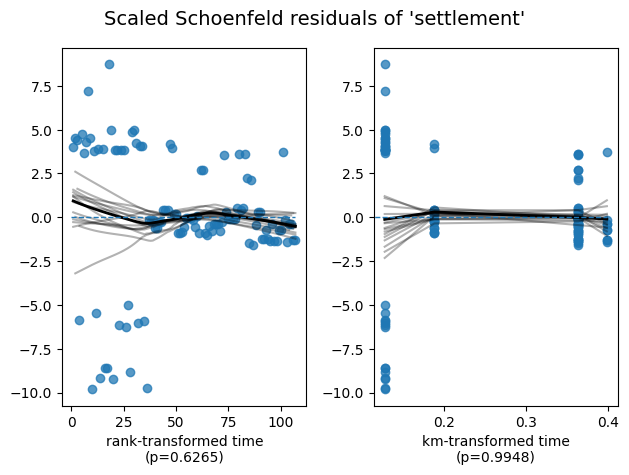

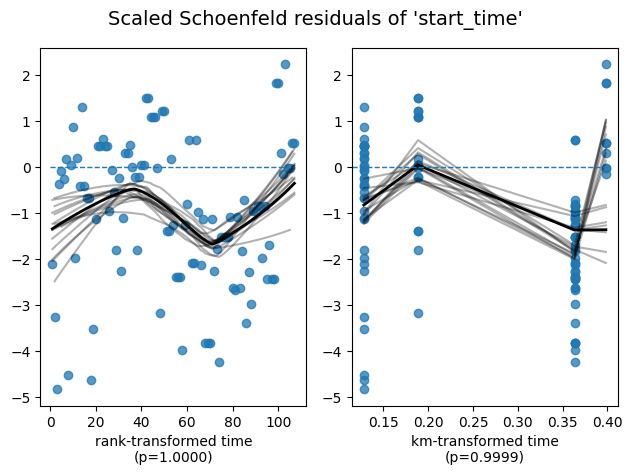

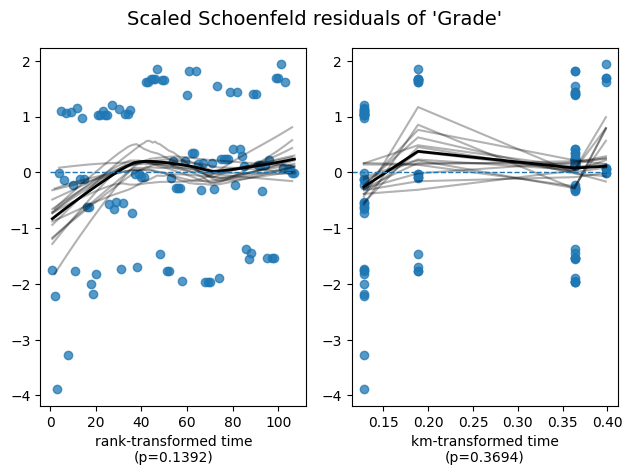

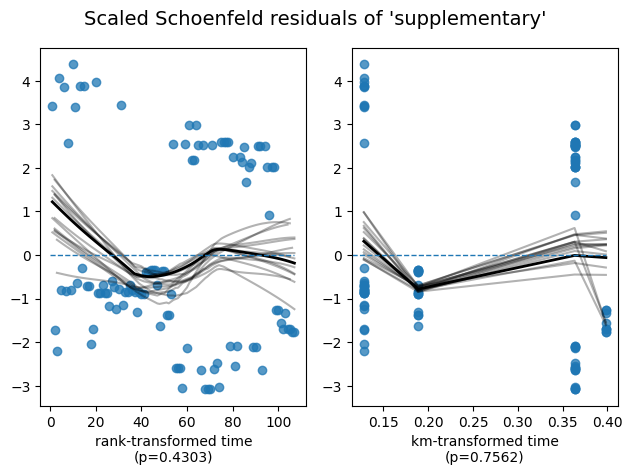

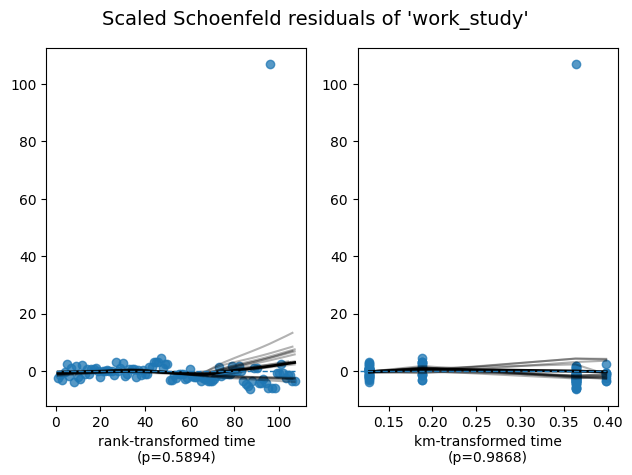

In [258]:
plt.figure(figsize=(20,20))
cph.check_assumptions(baseline_data[corr_cols], show_plots=True)
plt.show()

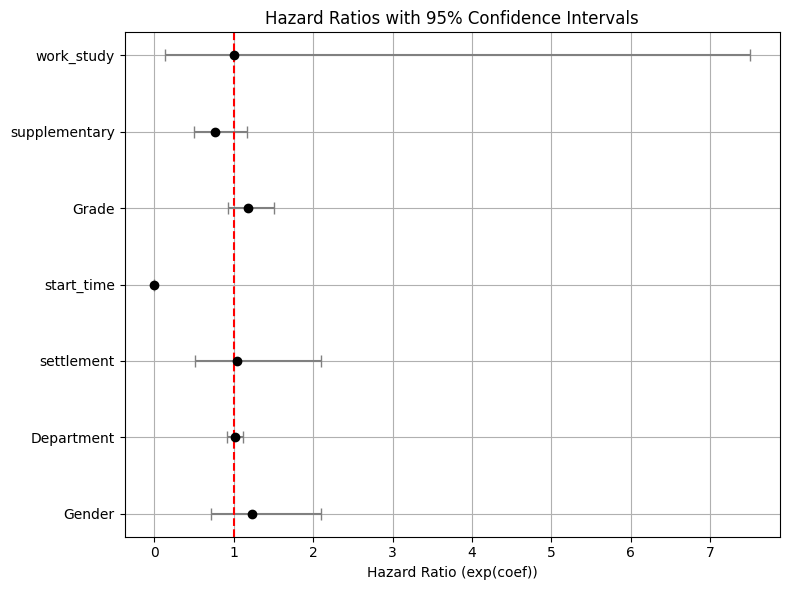

In [262]:
# Assume your fitted model is called `cph`
summary_df = cph.summary.copy()

# Prepare the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Extract values
variables = summary_df.index
hr = summary_df['exp(coef)']
lower_ci = summary_df['exp(coef) lower 95%']
upper_ci = summary_df['exp(coef) upper 95%']

# Plot the hazard ratios
ax.errorbar(hr, variables, xerr=[hr - lower_ci, upper_ci - hr], fmt='o', color='black', ecolor='gray', capsize=4)

# Reference line at HR=1 (no effect)
ax.axvline(x=1, color='red', linestyle='--')

# Labels and title
ax.set_xlabel('Hazard Ratio (exp(coef))')
ax.set_title('Hazard Ratios with 95% Confidence Intervals')
ax.grid(True)

plt.tight_layout()
plt.savefig("Baseline HR model")
plt.show()


## Kaplan Miere Estimator 

In [263]:
final_data.shape

(281, 22)

In [264]:
final_data.rename(columns={'Time': 'duration'},inplace=True)

<Axes: ylabel='duration'>

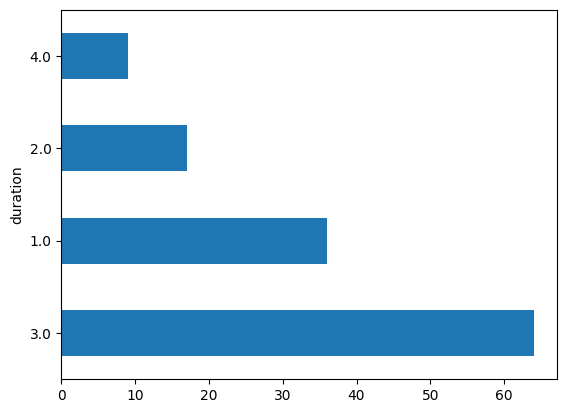

In [265]:
final_data.duration.value_counts().plot(kind='barh')

In [266]:
final_data[final_data.duration.isnull()].isnull().sum()

reg_no                   0
Settlement Type          0
Gender                   0
Department               0
Year_one                 0
Year1_remark             0
Year1_work_study         0
year1_supplementary      0
duration               155
Year_two                 0
Year2_remark             0
Year2_work_study         0
Year2_supplementary      0
Year_three              10
Year3_remark             9
Year3_work_study         9
Year3_supplementary      9
Year_four                0
Year4_remarks            0
Year4_work_study         0
Year4_supplementary      0
Event                    0
dtype: int64

In [267]:
final_data.loc[final_data.duration.isnull(), "duration"] = 4 # studied for four years and did not experience the event of interest

In [268]:
final_data.isnull().sum()

reg_no                   0
Settlement Type          0
Gender                   0
Department               0
Year_one                 0
Year1_remark             0
Year1_work_study         0
year1_supplementary      0
duration                 0
Year_two                36
Year2_remark            36
Year2_work_study        36
Year2_supplementary     36
Year_three              83
Year3_remark            82
Year3_work_study        82
Year3_supplementary     82
Year_four              116
Year4_remarks          116
Year4_work_study       116
Year4_supplementary    116
Event                    0
dtype: int64

In [269]:
final_data.duration.value_counts()

duration
4.0    164
3.0     64
1.0     36
2.0     17
Name: count, dtype: int64

## Gender

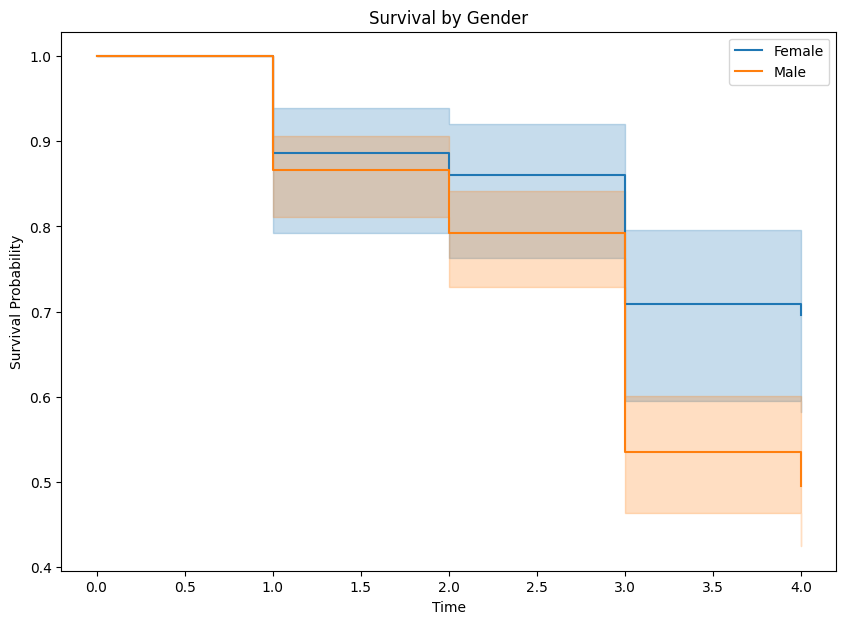

In [270]:
from lifelines import KaplanMeierFitter


kmf = KaplanMeierFitter()
plt.figure(figsize=(10,7))
# For example, Gender comparison
for label, group_df in final_data.groupby('Gender'):
    kmf.fit(group_df['duration'], event_observed=group_df['Event'], label=str(label))
    kmf.plot_survival_function()

plt.title('Survival by Gender')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()
# female have a higher survival rate compared to Males in FOST

In [271]:
from lifelines import KaplanMeierFitter
import pandas as pd

from lifelines import KaplanMeierFitter
import pandas as pd

def get_km_table_for_department(data, department):
    kmf = KaplanMeierFitter()
    dept_data = data[data['Department'] == department]

    kmf.fit(dept_data['duration'], event_observed=dept_data['Event'], label=department)

    summary_df = kmf.event_table.copy()
    summary_df = summary_df[['at_risk', 'observed']]
    sf = kmf.survival_function_
    ci = kmf.confidence_interval_
    
    # Extract values
    summary_df['Survival Probability'] = sf[department]
    summary_df['95% CI Lower'] = ci[f'{department}_lower_0.95']
    summary_df['95% CI Upper'] = ci[f'{department}_upper_0.95']
    
    # Approximate standard error
    z = 1.96
    summary_df['Standard Error'] = (summary_df['95% CI Upper'] - summary_df['95% CI Lower']) / (2 * z)

    # Format
    summary_df = summary_df.reset_index().rename(columns={'event_at': 'Time (Years)', 
                                                           'at_risk': 'At Risk', 
                                                           'observed': 'Observed Events (Dropouts)'})
    return summary_df


get_km_table_for_department(final_data,'MCS')

,Time (Years),At Risk,Observed Events (Dropouts),Survival Probability,95% CI Lower,95% CI Upper,Standard Error
0,0.0,70,0,1.000000,1.000000,1.000000,0.000000
1,1.0,70,5,0.928571,0.836873,0.969631,0.033867
2,2.0,65,5,0.857143,0.750758,0.920452,0.043289
3,3.0,60,15,0.642857,0.518937,0.742600,0.057057
4,4.0,45,2,0.614286,0.490057,0.716821,0.057848


In [272]:
from lifelines.statistics import logrank_test

female = final_data[final_data['Gender'] == 'Female']
male = final_data[final_data['Gender'] == 'Male']

results = logrank_test(female['duration'], male['duration'], 
                       event_observed_A=female['Event'], 
                       event_observed_B=male['Event'])
results.print_summary()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           8.14 <0.005      7.85

In [273]:
def logrank_test_summary(data, duration_col='duration', event_col='Event', group_col='Settlement Type'):
    groups = data[group_col].unique()
    if len(groups) != 2:
        raise ValueError("This function supports only two groups for comparison.")
    
    group1, group2 = groups
    df1 = data[data[group_col] == group1]
    df2 = data[data[group_col] == group2]
    
    # Combine and sort
    combined_df = pd.concat([df1, df2])
    combined_df = combined_df[[duration_col, event_col, group_col]].sort_values(by=duration_col)
    
    # Compute at-risk table
    T = combined_df[duration_col]
    E = combined_df[event_col]
    G = combined_df[group_col]
    
    timeline = np.unique(T)
    n1 = []
    n2 = []
    d1 = []
    d2 = []
    
    for t in timeline:
        at_risk1 = ((df1[duration_col] >= t)).sum()
        at_risk2 = ((df2[duration_col] >= t)).sum()
        events1 = ((df1[duration_col] == t) & (df1[event_col] == 1)).sum()
        events2 = ((df2[duration_col] == t) & (df2[event_col] == 1)).sum()
        n1.append(at_risk1)
        n2.append(at_risk2)
        d1.append(events1)
        d2.append(events2)
    
    # Convert to arrays
    n1 = np.array(n1)
    n2 = np.array(n2)
    d1 = np.array(d1)
    d2 = np.array(d2)
    N = n1 + n2
    D = d1 + d2
    
    # Expected values for group1
    E1 = D * (n1 / N)
    E2 = D * (n2 / N)
    
    V = (n1 * n2 * D * (N - D)) / (N**2 * (N - 1) + 1e-8)  # Add epsilon to avoid div0
    
    observed1 = d1.sum()
    expected1 = E1.sum()
    var = V.sum()
    
    observed2 = d2.sum()
    expected2 = E2.sum()
    
    oe_e1 = ((observed1 - expected1)**2) / expected1 if expected1 != 0 else np.nan
    oe_e2 = ((observed2 - expected2)**2) / expected2 if expected2 != 0 else np.nan
    oe_v = ((observed1 - expected1)**2) / var if var != 0 else np.nan
    
    return pd.DataFrame({
        group_col: [group1, group2],
        "N": [len(df1), len(df2)],
        "Observed": [observed1, observed2],
        "Expected": [expected1, expected2],
        "(O−E)²⁄E": [oe_e1, oe_e2],
        "(O−E)²⁄V": [oe_v, oe_v]
    }).round(3)
logrank_test_summary(final_data)

,Settlement Type,N,Observed,Expected,(O−E)²⁄E,(O−E)²⁄V
0,GOK,263,111,122.129,1.014,40.026
1,SSP,18,15,3.871,31.995,40.026


In [274]:
final_data.Event.sum()

126

In [275]:
final_data.duration.value_counts()

duration
4.0    164
3.0     64
1.0     36
2.0     17
Name: count, dtype: int64

In [278]:
final_data.Gender.value_counts()

Gender
Male      202
Female     79
Name: count, dtype: int64

In [279]:
final_data.columns 

Index(['reg_no', 'Settlement Type', 'Gender', 'Department', 'Year_one',
       'Year1_remark', 'Year1_work_study', 'year1_supplementary', 'duration',
       'Year_two', 'Year2_remark', 'Year2_work_study', 'Year2_supplementary',
       'Year_three', 'Year3_remark', 'Year3_work_study', 'Year3_supplementary',
       'Year_four', 'Year4_remarks', 'Year4_work_study', 'Year4_supplementary',
       'Event'],
      dtype='object')

In [280]:
def get_km_table_for_gender(data, gender):
    kmf = KaplanMeierFitter()
    gender_data = data[data['Gender'] == gender]

    kmf.fit(gender_data['duration'], event_observed=gender_data['Event'], label=gender)

    summary_df = kmf.event_table.copy()
    summary_df = summary_df[['at_risk', 'observed']]
    sf = kmf.survival_function_
    ci = kmf.confidence_interval_
    
    # Extract values
    summary_df['Survival Probability'] = sf[gender]
    summary_df['95% CI Lower'] = ci[f'{gender}_lower_0.95']
    summary_df['95% CI Upper'] = ci[f'{gender}_upper_0.95']
    
    # Approximate standard error
    z = 1.96
    summary_df['Standard Error'] = (summary_df['95% CI Upper'] - summary_df['95% CI Lower']) / (2 * z)

    # Format
    summary_df = summary_df.reset_index().rename(columns={'event_at': 'Time (Years)', 
                                                           'at_risk': 'At Risk', 
                                                           'observed': 'Observed Events (Dropouts)'})
    return summary_df
get_km_table_for_gender(final_data,'Male')

,Time (Years),At Risk,Observed Events (Dropouts),Survival Probability,95% CI Lower,95% CI Upper,Standard Error
0,0.0,202,0,1.000000,1.000000,1.000000,0.000000
1,1.0,202,27,0.866337,0.811159,0.906318,0.024275
2,2.0,175,15,0.792079,0.729333,0.841859,0.028706
3,3.0,160,52,0.534653,0.463494,0.600592,0.034974
4,4.0,108,8,0.495050,0.424381,0.561721,0.035036


## GOK/SSP

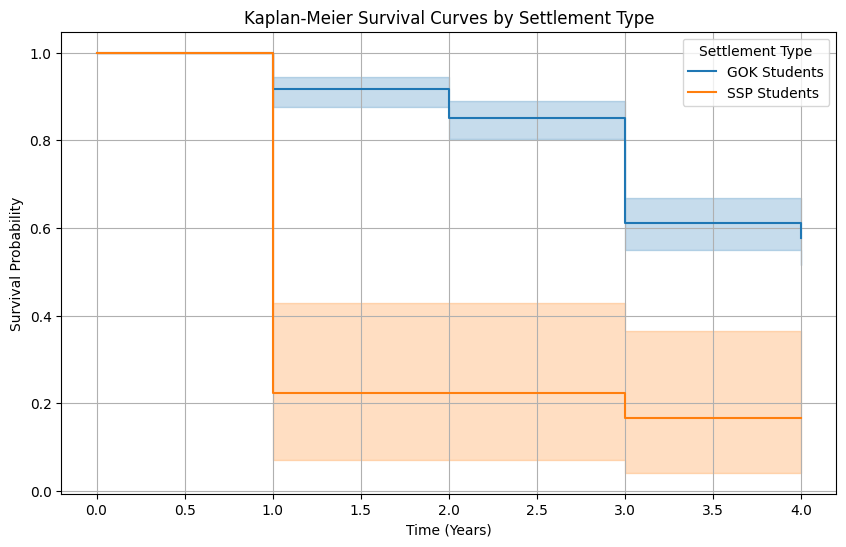

In [281]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Create an empty DataFrame to store survival probabilities and confidence intervals
survival_df = pd.DataFrame()

# Split data based on Settlement type
GOK = final_data[final_data['Settlement Type'] == "GOK"]
SSP = final_data[final_data['Settlement Type'] == "SSP"]

# Plot GOK first
plt.figure(figsize=(10,6))

# Fit the Kaplan-Meier model for GOK students
kmf.fit(durations=GOK['duration'], event_observed=GOK['Event'], label="GOK Students")
ax = kmf.plot(ci_show=True)

# Get survival probabilities and confidence intervals for GOK
survival_prob_GOK = kmf.survival_function_
ci_GOK = kmf.confidence_interval_

# Combine the survival probabilities and confidence intervals into a single DataFrame for GOK
GOK_survival_df = survival_prob_GOK.copy()
GOK_survival_df['GOK Students'] = GOK_survival_df['GOK Students']
GOK_survival_df['GOK Students_lower_0.95'] = ci_GOK['GOK Students_lower_0.95']
GOK_survival_df['GOK Students_upper_0.95'] = ci_GOK['GOK Students_lower_0.95']
GOK_survival_df['Settlement Type'] = 'GOK'  # Add the Settlement Type column for identification

# Plot SSP next (on the same axis)
kmf.fit(durations=SSP['duration'], event_observed=SSP['Event'], label="SSP Students")
kmf.plot(ax=ax, ci_show=True)

# Get survival probabilities and confidence intervals for SSP
survival_prob_SSP = kmf.survival_function_
ci_SSP = kmf.confidence_interval_

# Combine the survival probabilities and confidence intervals into a single DataFrame for SSP
SSP_survival_df = survival_prob_SSP.copy()
SSP_survival_df['SSP Students'] = SSP_survival_df['SSP Students']
SSP_survival_df['SSP Students_lower_0.95'] = ci_SSP['SSP Students_lower_0.95']
SSP_survival_df['SSP Students_upper_0.95'] = ci_SSP['SSP Students_upper_0.95']
SSP_survival_df['Settlement Type'] = 'SSP'  # Add the Settlement Type column for identification

# Concatenate the GOK and SSP survival DataFrames
survival_df = pd.concat([GOK_survival_df, SSP_survival_df],axis=1)

# Plot decoration
plt.title("Kaplan-Meier Survival Curves by Settlement Type")
plt.xlabel("Time (Years)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend(title="Settlement Type", loc='best')
plt.show() # fees 

In [282]:
SSP_survival_df

,SSP Students,SSP Students_lower_0.95,SSP Students_upper_0.95,Settlement Type
timeline,,,,
0.0,1.000000,1.000000,1.000000,SSP
1.0,0.222222,0.069120,0.428837,SSP
3.0,0.166667,0.041211,0.365424,SSP
4.0,0.166667,0.041211,0.365424,SSP


In [283]:
# Display the combined DataFrame with survival probabilities and confidence intervals
survival_df.head()  # Show the first few rows of the DataFrame


,GOK Students,GOK Students_lower_0.95,GOK Students_upper_0.95,Settlement Type,SSP Students,SSP Students_lower_0.95,SSP Students_upper_0.95,Settlement Type
timeline,,,,,,,,
0.0,1.000000,1.000000,1.000000,GOK,1.000000,1.000000,1.000000,SSP
1.0,0.916350,0.875738,0.875738,GOK,0.222222,0.069120,0.428837,SSP
2.0,0.851711,0.802713,0.802713,GOK,NaN,NaN,NaN,NaN
3.0,0.612167,0.550449,0.550449,GOK,0.166667,0.041211,0.365424,SSP
4.0,0.577947,0.515860,0.515860,GOK,0.166667,0.041211,0.365424,SSP


In [284]:
from lifelines.statistics import logrank_test

results = logrank_test(GOK['duration'], SSP['duration'], 
                       event_observed_A=GOK['Event'], 
                       event_observed_B=SSP['Event'])

results.print_summary()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          40.03 <0.005     31.89

### Department 

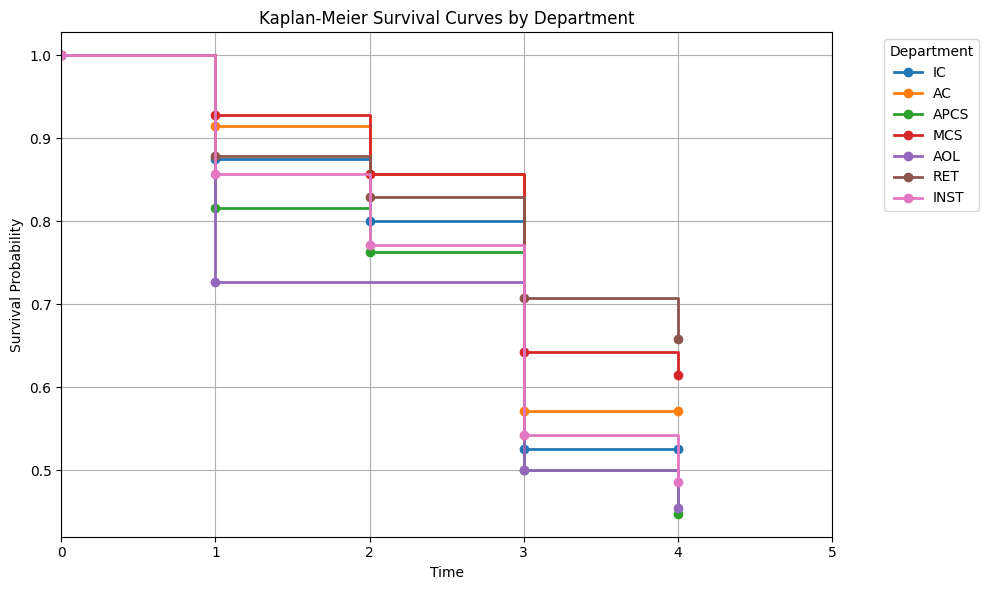

In [286]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
import pandas as pd

# Initialize Kaplan-Meier Fitter
kmf = KaplanMeierFitter()

survival_df = pd.DataFrame()


# Set up the plot
plt.figure(figsize=(10, 6))

# Plot Kaplan-Meier curves for each department with different styles
for dept in final_data['Department'].unique():
    dept_data = final_data[final_data['Department'] == dept]
    kmf.fit(dept_data['duration'], event_observed=dept_data['Event'], label=dept)

    # Get survival probabilities and confidence intervals
    survival_prob = kmf.survival_function_
    ci = kmf.confidence_interval_

    # Combine the survival probabilities and confidence intervals into a single DataFrame
    dept_survival_df = survival_prob.join(ci, rsuffix='_ci')
    dept_survival_df['Department'] = dept  # Add the department column for identification

    # Append the department-specific DataFrame to the main DataFrame
    survival_df = pd.concat([survival_df, dept_survival_df])
    
    # Plot with markers and a different line style for each department
    kmf.plot(ci_show=False, linewidth=2, marker='o', markersize=6)

# Customize the plot
plt.title('Kaplan-Meier Survival Curves by Department')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Department', loc='upper right', bbox_to_anchor=(1.2, 1))  # Legend outside plot

# Optionally, you can zoom in on a specific time range
plt.xlim(0,5)  # Adjust based on your data

# Show grid lines for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()  # Ensure there's no clipping of labels
plt.show()

# There is no much significant difference between the survival rate across the different departments in fost

In [288]:
from lifelines.statistics import logrank_test
import pandas as pd

# Create a DataFrame for your data (if not already in DataFrame format)
# Assuming 'final_data' contains 'duration', 'Event', and 'Department'

# Example: Comparing two departments (adjust as needed for more comparisons)
dept1_data = final_data[final_data['Department'] == 'MCS']
dept2_data = final_data[final_data['Department'] == 'APCS']

# Perform the Log-Rank test
results = logrank_test(dept1_data['duration'], dept2_data['duration'], 
                       event_observed_A=dept1_data['Event'], event_observed_B=dept2_data['Event'])

# Print the test results
print(f"Log-Rank Test p-value: {results.p_value}")

# Check if the p-value is significant (typically < 0.05)
if results.p_value < 0.05:
    print("There is a significant difference in survival between the two departments.")
else:
    print("There is no significant difference in survival between the two departments.")


Log-Rank Test p-value: 0.07846444642367813
There is no significant difference in survival between the two departments.


## Overall Kaplan Miere Estimates 

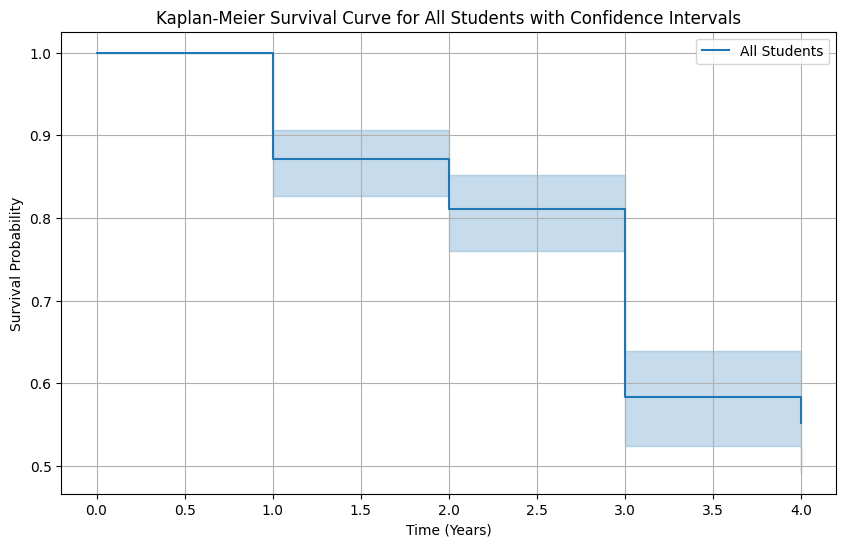

In [290]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier model for the entire dataset
kmf.fit(durations=final_data['duration'], event_observed=final_data['Event'], label="All Students")

# Plot the Kaplan-Meier survival curve
plt.figure(figsize=(10, 6))

# Plot the survival curve with confidence intervals
ax = kmf.plot(ci_show=True)

# Get the survival probabilities and confidence intervals
survival_prob = kmf.survival_function_
ci = kmf.confidence_interval_

# Add the upper and lower confidence intervals to the plot manually (if needed)
# To fill between the upper and lower CI, we can use plt.fill_between
# plt.fill_between(survival_prob.index, ci['All Students_lower_0.95'], ci['All Students_upper_0.95'], color='g', alpha=0.2)

# Plot decoration
plt.title("Kaplan-Meier Survival Curve for All Students with Confidence Intervals")
plt.xlabel("Time (Years)")
plt.ylabel("Survival Probability")
plt.grid(True)

# Show the plot
plt.show()


### Loglikelihood Test

In [293]:
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test
import numpy as np
import pandas as pd
from scipy import stats

# 1. Likelihood Ratio Test
llr_statistic = -2 * (ctv1.log_likelihood_ - ctv2.log_likelihood_)
p_value = 1 - stats.chi2.cdf(llr_statistic, df=1)  # Degrees of freedom depends on the number of additional parameters in model 2
print(f"Likelihood Ratio Test p-value: {p_value}")

# 2. Wald Test (to check individual coefficients' significance)
ctv1.print_summary()
ctv2.print_summary() #If p < 0.05: Reject the null → additional variable(s) significantly improve the model.

Likelihood Ratio Test p-value: 0.0006558577027983015


<lifelines.CoxTimeVaryingFitter: fitted with 888 periods, 281 subjects, 107 events>
         event col = 'Event'
number of subjects = 281
 number of periods = 888
  number of events = 107
partial log-likelihood = -479.45
  time fit was run = 2025-05-09 14:01:26 UTC

---
               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                      
Gender         0.68      1.97      0.27            0.15            1.20                1.16                3.34
Department     0.12      1.13      0.05            0.02            0.22                1.02                1.25
settlement    -1.76      0.17      0.35           -2.45           -1.07                0.09                0.34
Grade          1.33      3.79      0.12            1.10            1.56                3.00                4.77
supplementary -0.50      0.60      0.22           -0.93           -0.08                0.40                0.92
work_study     0.79      2.21      1.03           -1.22            2.81                0.29               16.58

               cmp to     z      p  -log2(p)
covariate                                   
Gender           0.00  2.50   0.01      6.35
Department       0.00  2.30   0.02      5.55
settlement       0.00 -5.01 <0.005     20.78
Grade            0.00 11.28 <0.005     95.62
supplementary    0.00 -2.33   0.02      5.67
work_study       0.00  0.77   0.44      1.18
---
Partial AIC = 970.90
log-likelihood ratio test = 184.73 on 6 df
-log2(p) of ll-ratio test = 121.17

<lifelines.CoxTimeVaryingFitter: fitted with 888 periods, 281 subjects, 107 events>
         event col = 'Event'
number of subjects = 281
 number of periods = 888
  number of events = 107
partial log-likelihood = -473.64
  time fit was run = 2025-05-09 14:03:14 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
Gender               0.70      2.01      0.27            0.17            1.23                1.18                3.42
Department           0.12      1.13      0.05            0.02            0.22                1.02                1.24
settlement          -1.72      0.18      0.35           -2.41           -1.04                0.09                0.35
Grade                1.53      4.62      0.14            1.26            1.80                3.53                6.03
supplementary        3.52     33.89      1.15            1.26            5.78                3.54              324.43
Grade_supplementary -1.04      0.35      0.30           -1.63           -0.45                0.20                0.64

                     cmp to     z      p  -log2(p)
covariate                                         
Gender                 0.00  2.58   0.01      6.68
Department             0.00  2.30   0.02      5.55
settlement             0.00 -4.91 <0.005     20.08
Grade                  0.00 11.20 <0.005     94.30
supplementary          0.00  3.06 <0.005      8.80
Grade_supplementary    0.00 -3.46 <0.005     10.88
---
Partial AIC = 959.29
log-likelihood ratio test = 196.34 on 6 df
-log2(p) of ll-ratio test = 129.37